______

## Web Scraping Project using Selenium

In [1]:
# import all the required libraries which is used for the webscraping.
# i haved used selenium for the websracping.


import requests
from bs4 import BeautifulSoup
import re

import numpy as np
import pandas as pd

from selenium import webdriver

import time

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [26]:
# We have selected bikewale website for our web scraping project.
# checking the source code of the page using [requests.get]

page = requests.get("https://www.bikewale.com/used/bikes-in-mumbai/#")
page

<Response [200]>

In [2]:
url = 'https://www.bikewale.com/used/bikes-in-hyderabad/#'
driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')
driver.get(url)

In [3]:
soup = BeautifulSoup(driver.page_source,'html.parser')
driver.close()

In [7]:
# Extracting the columns and rows for the website one-by-one.

soup.find_all("a",class_="text-truncate text-black")[0].text

'2020, Yamaha FZ S FI Standard - BS VI [2020] '

In [43]:
# Here we are extacting the price of the bike from the bikewale website.

price = []
for soup in all_bikes:
    i = soup.find_all("span",class_="font22 text-bold")[0]
    price.append(i.text)

In [27]:
# Here we are extracting the brand of the bike from the bikewale website.

brand = []
for soup in all_bikes:
    i = soup.find_all("a",class_="text-truncate text-black")[0]
    brand.append(i.text.split()[1])

In [31]:
# Here we are extracting the sub_brand of the bike from the bikewale website.

sub_brand = []
for soup in all_bikes:
    i = soup.find_all("a",class_="text-truncate text-black")[0]
    sub_brand.append(i.text.split()[2])

In [9]:
# Extraction the location column from the website.

location = []
for soup in all_bikes:
    i = soup.find_all("span",class_="model-details-label")[3]
    location.append(i.text)

In [81]:
# exracting first column.
soup.find_all("span",class_="font12 text-x-light")[0].text

'Updated on: 19 November 2022 '

In [62]:
# Here we are exracting the owner of the bike like 1st owner,2nd owner and 3rd owner.

owner =[]
for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])

In [69]:
# Here we are extracting the kms of the bike from the bikewale website.

kms =[]
for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])

In [88]:
# Here we are extracting the updated date or date of uploaded in the bike from the bikewale website.

date = []
for soup in all_bikes:
        i = soup.find_all("div",class_="margin-bottom5")[0]
        a = i.text
        b = re.findall(r'(\d+\s\w+\s2022)',a)
        date.append(b)

In [3]:
# Here we are extracting the cc of the bike from the bikewale website.

cc = []
for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        a = i.text.split()
        b =' '.join(a)
        c = re.findall(r'\s\d{3}\s',b)
        if c:
            cc.append(c[0])
        else:
            cc.append(np.nan)

In [2]:
# writing the code to extract the data for the choosen cities and i have choosen hyderabad,mumbai,bangalore and pune.
# Taking all the codes related for this and created in the one cell using for loop extract the data for one by one city.
# Extracting the data from the hyderabad city.

model = []
price = []
kms = []
owner = []
location = []
date = []
brand = []
sub_brand = []
cc = []

# creating a for loop to get data from all the pages in the hyderbad city.
# Checking the page source code and for extracing here we are using selenium and beautifulsoup.

for x in range(1,11): 
    url = f'https://www.bikewale.com/used/bikes-in-hyderabad/#pn={x}'
    driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')# chrome driver path
    driver.get(url)# inspecting the url
    
    time.sleep(3)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    driver.close()
    
# this is the tag and id of the entire page.
    all_bikes = soup.find_all("div",attrs = {'id':'usedBikeContent'})
    print(url)

# Here we are extracting the model of the bike manufactured.
# Appending model=[] above
    
    for soup in all_bikes:
        i = soup.find("span",attrs = {'class':"model-details-label"})
        model.append(i.text.split()[0])
        
# This the code to extarct the price of the bikes.
# Appending price = [] above

    for soup in all_bikes:
        i = soup.find_all("span",class_="font22 text-bold")[0]
        price.append(i.text)
        
# This the code to extarct the kilometers driven of the bikes.
# Appending kms = [] above        

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])
        
# This the code to extarct the owner of the bikes.
# Appending owner = [] above
    
    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])
        
# This the code to extarct the location of the bikes.
# Appending location = [] above        
        
    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[3]
        location.append(i.text)
        
# This the code to extarct the updated date of the bikes in the website.
# Appending date = [] above

    for soup in all_bikes:
        i = soup.find_all("div",class_="margin-bottom5")[0]
        a = i.text
        b = re.findall(r'(\d+\s\w+\s2022)',a)
        if b:
            date.append(b[0])
            
# This the code to extarct the brand of the bikes from the website.
# Appending brand = [] above

    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        brand.append(i.text.split()[1])
        
# This the code to extarct the sub_brand of the bikes from the website.
# Appending sub_brand = [] above        
    
    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        sub_brand.append(i.text.split()[2])
        
# code to extract the cc of the bikes in the website.
# In this code regex(regular expressions) are also used to get reqiured data.
# Appending cc = [] above

    for soup in all_bikes:
            i = soup.find_all("a",class_="text-truncate text-black")[0]
            a = i.text.split()
            b =' '.join(a)
            c = re.findall(r'\s\d{3}\s',b)
            if c:
                cc.append(c[0])
            else:
                cc.append(np.nan)

https://www.bikewale.com/used/bikes-in-hyderabad/#pn=1
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=2
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=3
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=4
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=5
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=6
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=7
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=8
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=9
https://www.bikewale.com/used/bikes-in-hyderabad/#pn=10


In [3]:
# Checking the length of the each column.
# checking the len of the all the columns are matched.

len(model)
len(price)
len(kms)
len(owner)
len(location)
len(date)
len(brand)
len(sub_brand)
len(cc)

200

200

200

200

200

200

200

200

200

In [5]:
# Creating the dictionary as (dict1) for the extarcted columns we have needed.
# Assingning the colunms names before creating the DataFrame.

dict1 = {
    "brand":brand,
    "sub_brand":sub_brand,
    "model":model,
    "owner":owner,
    "kms":kms,
    "price":price,
    "cc":cc,
    "location":location,
    'updated_date':date
}

In [6]:
# Converting the dict1 into DataFrame using pandas.
# Storing in a variable named as df1 and checking the rows and coulmns.

df1 = pd.DataFrame(dict1)
df1

brand sub_brand model owner     kms    price     cc    location  \
0       TVS    Scooty  2012   1st  10,000  12,000     NaN  Hyderabad    
1     Bajaj    Pulsar  2010   2nd  50,000  35,000    150   Hyderabad    
2     Honda        CB  2017   1st  59,000  75,000     NaN  Hyderabad    
3       TVS    Scooty  2019   1st   9,000  45,000     NaN  Hyderabad    
4    Yamaha   Fascino  2016   1st  25,000  25,000    110   Hyderabad    
..      ...       ...   ...   ...     ...      ...    ...         ...   
195   Honda    Activa  2014   1st  23,000  40,000     NaN  Hyderabad    
196   Honda        CB  2013   1st  49,900  40,000     NaN  Hyderabad    
197     TVS   Jupiter  2018   1st  40,000  48,000     NaN  Hyderabad    
198  Yamaha       YZF  2015   1st  27,000  65,000     NaN  Hyderabad    
199  Yamaha        FZ  2020   1st   8,762  90,000     NaN  Hyderabad    

          updated_date  
0     07 December 2022  
1     07 December 2022  
2     06 December 2022  
3     06 December 2022  
4     05 December 2022  
..                 ...  
195  12 September 2022  
196  12 September 2022  
197  12 September 2022  
198  12 September 2022  
199  12 September 2022  

[200 rows x 9 columns]

## Extracting data from the bangalore location

In [9]:
model = []
price = []
kms = []
owner = []
location = []
date = []
brand = []
sub_brand = []
cc = []

for x in range(1,19): 
    url = f'https://www.bikewale.com/used/bikes-in-bangalore/#pn={x}'
    driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')
    driver.get(url)

    time.sleep(3)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    driver.close()

    all_bikes = soup.find_all("div",attrs = {'id':'usedBikeContent'})
    print(url)

    for soup in all_bikes:
        i = soup.find("span",attrs = {'class':"model-details-label"})
        model.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="font22 text-bold")[0]
        price.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])


    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[3]
        location.append(i.text)


    for soup in all_bikes:
        i = soup.find_all("div",class_="margin-bottom5")[0]
        a = i.text
        b = re.findall(r'(\d+\s\w+\s2022)',a)
        if b:
            date.append(b[0])

    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        brand.append(i.text.split()[1])


    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        sub_brand.append(i.text.split()[2])
        
    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        a = i.text.split()
        b =' '.join(a)
        c = re.findall(r'\s\d{3}\s',b)
        if c:
            cc.append(c[0])
        else:
            cc.append(np.nan)

https://www.bikewale.com/used/bikes-in-bangalore/#pn=1
https://www.bikewale.com/used/bikes-in-bangalore/#pn=2
https://www.bikewale.com/used/bikes-in-bangalore/#pn=3
https://www.bikewale.com/used/bikes-in-bangalore/#pn=4
https://www.bikewale.com/used/bikes-in-bangalore/#pn=5
https://www.bikewale.com/used/bikes-in-bangalore/#pn=6
https://www.bikewale.com/used/bikes-in-bangalore/#pn=7
https://www.bikewale.com/used/bikes-in-bangalore/#pn=8
https://www.bikewale.com/used/bikes-in-bangalore/#pn=9
https://www.bikewale.com/used/bikes-in-bangalore/#pn=10
https://www.bikewale.com/used/bikes-in-bangalore/#pn=11
https://www.bikewale.com/used/bikes-in-bangalore/#pn=12
https://www.bikewale.com/used/bikes-in-bangalore/#pn=13
https://www.bikewale.com/used/bikes-in-bangalore/#pn=14
https://www.bikewale.com/used/bikes-in-bangalore/#pn=15
https://www.bikewale.com/used/bikes-in-bangalore/#pn=16
https://www.bikewale.com/used/bikes-in-bangalore/#pn=17
https://www.bikewale.com/used/bikes-in-bangalore/#pn=18


In [10]:
len(model)
len(price)
len(kms)
len(owner)
len(location)
len(date)
len(brand)
len(sub_brand)
len(cc)

360

360

360

360

360

360

360

360

360

In [11]:
# Creating the dictionary as (dict2) for the extarcted columns we have needed from the bangalore location.
# Assingning the colunms names before creating the DataFrame.

dict2 = {
    "brand":brand,
    "sub_brand":sub_brand,
    "model":model,
    "owner":owner,
    "kms":kms,
    "price":price,
    "cc":cc,
    "location":location,
    'updated_date':date
}

In [12]:
# Converting the dict2 into DataFrame using pandas.
# Storing in a variable named as df2 and checking the rows and coulmns.

df2 = pd.DataFrame(dict2)
df2

brand sub_brand model owner       kms      price     cc    location  \
0      Yamaha     Fazer  2011   2nd    12,000    45,000     NaN  Bangalore    
1      Yamaha        FZ  2015   1st    32,366    72,000     NaN  Bangalore    
2       Bajaj   Avenger  2022   1st       800  1,55,000    220   Bangalore    
3       Bajaj  Discover  2009   2nd  9,99,999    25,000    135   Bangalore    
4         TVS   Jupiter  2018   1st    25,000    50,000     NaN  Bangalore    
..        ...       ...   ...   ...       ...        ...    ...         ...   
355     Royal   Enfield  2022   1st     1,700  2,60,000    350   Bangalore    
356    Yamaha        FZ  2015   1st    35,500    60,000     NaN  Bangalore    
357     Ather      450X  2022   1st     4,950  1,50,000     NaN  Bangalore    
358  Mahindra      Mojo  2015   2nd    70,000  1,70,000     NaN  Bangalore    
359     Royal   Enfield  2019   1st     8,200  1,80,000     NaN  Bangalore    

          updated_date  
0     07 December 2022  
1     07 December 2022  
2     07 December 2022  
3     07 December 2022  
4     07 December 2022  
..                 ...  
355  13 September 2022  
356  12 September 2022  
357  12 September 2022  
358  12 September 2022  
359  12 September 2022  

[360 rows x 9 columns]

## Extracting data from the mumbai location

In [16]:
model = []
price = []
kms = []
owner = []
location = []
date = []
brand = []
sub_brand = []
cc = []

for x in range(1,7): 
    url = f'https://www.bikewale.com/used/bikes-in-mumbai/#pn={x}'
    driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')
    driver.get(url)

    time.sleep(3)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    driver.close()

    all_bikes = soup.find_all("div",attrs = {'id':'usedBikeContent'})
    print(url)

    for soup in all_bikes:
        i = soup.find("span",attrs = {'class':"model-details-label"})
        model.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="font22 text-bold")[0]
        price.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])


    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[3]
        location.append(i.text)


    for soup in all_bikes:
        i = soup.find_all("div",class_="margin-bottom5")[0]
        a = i.text
        b = re.findall(r'(\d+\s\w+\s2022)',a)
        if b:
            date.append(b[0])

    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        brand.append(i.text.split()[1])


    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        sub_brand.append(i.text.split()[2])
        
    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        a = i.text.split()
        b =' '.join(a)
        c = re.findall(r'\s\d{3}\s',b)
        if c:
            cc.append(c[0])
        else:
            cc.append(np.nan)

https://www.bikewale.com/used/bikes-in-mumbai/#pn=1
https://www.bikewale.com/used/bikes-in-mumbai/#pn=2
https://www.bikewale.com/used/bikes-in-mumbai/#pn=3
https://www.bikewale.com/used/bikes-in-mumbai/#pn=4
https://www.bikewale.com/used/bikes-in-mumbai/#pn=5
https://www.bikewale.com/used/bikes-in-mumbai/#pn=6


In [17]:
len(model)
len(price)
len(kms)
len(owner)
len(location)
len(date)
len(brand)
len(sub_brand)
len(cc)

120

120

120

120

120

120

120

120

120

In [18]:
# Creating the dictionary as (dict3) for the extarcted columns we have needed from the mumbai location.
# Assingning the colunms names before creating the DataFrame.

dict3 = {
    "brand":brand,
    "sub_brand":sub_brand,
    "model":model,
    "owner":owner,
    "kms":kms,
    "price":price,
    "cc":cc,
    "location":location,
    'updated_date':date
}

In [19]:
# Converting the dict3 into DataFrame using pandas.
# Storing in a variable named as df3 and checking the rows and coulmns.

df3 = pd.DataFrame(dict3)
df3

brand sub_brand model owner     kms      price     cc location  \
0       TVS    Apache  2018   1st  12,000    75,000    200   Mumbai    
1    Yamaha       YZF  2017   2nd  28,000    90,000     NaN  Mumbai    
2     Royal   Enfield  2016   1st  30,000  1,25,000    500   Mumbai    
3       KTM       390  2019   1st  35,000  2,20,000    390   Mumbai    
4    Yamaha        FZ  2015   1st   7,000    60,000     NaN  Mumbai    
..      ...       ...   ...   ...     ...        ...    ...      ...   
115  Yamaha       YZF  2020   1st   1,800  1,40,000     NaN  Mumbai    
116   Honda        CB  2015   1st  27,457    45,000     NaN  Mumbai    
117  Suzuki   Burgman  2022   1st   1,600  1,00,000    125   Mumbai    
118   Honda   X-Blade  2020   1st   3,300  1,10,000     NaN  Mumbai    
119   Bajaj    Pulsar  2020   1st  21,000  1,20,000     NaN  Mumbai    

          updated_date  
0     07 December 2022  
1     07 December 2022  
2     07 December 2022  
3     01 December 2022  
4     01 December 2022  
..                 ...  
115  14 September 2022  
116  14 September 2022  
117  14 September 2022  
118  14 September 2022  
119  14 September 2022  

[120 rows x 9 columns]

## Extracting data from the pune location

In [20]:
model = []
price = []
kms = []
owner = []
location = []
date = []
brand = []
sub_brand = []
cc = []

for x in range(1,11): 
    url = f'https://www.bikewale.com/used/bikes-in-pune/#pn={x}'
    driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')
    driver.get(url)

    time.sleep(3)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    driver.close()

    all_bikes = soup.find_all("div",attrs = {'id':'usedBikeContent'})
    print(url)

    for soup in all_bikes:
        i = soup.find("span",attrs = {'class':"model-details-label"})
        model.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="font22 text-bold")[0]
        price.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])


    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[3]
        location.append(i.text)


    for soup in all_bikes:
        i = soup.find_all("div",class_="margin-bottom5")[0]
        a = i.text
        b = re.findall(r'(\d+\s\w+\s2022)',a)
        if b:
            date.append(b[0])

    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        brand.append(i.text.split()[1])


    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        sub_brand.append(i.text.split()[2])
        
    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        a = i.text.split()
        b =' '.join(a)
        c = re.findall(r'\s\d{3}\s',b)
        if c:
            cc.append(c[0])
        else:
            cc.append(np.nan)

https://www.bikewale.com/used/bikes-in-pune/#pn=1
https://www.bikewale.com/used/bikes-in-pune/#pn=2
https://www.bikewale.com/used/bikes-in-pune/#pn=3
https://www.bikewale.com/used/bikes-in-pune/#pn=4
https://www.bikewale.com/used/bikes-in-pune/#pn=5
https://www.bikewale.com/used/bikes-in-pune/#pn=6
https://www.bikewale.com/used/bikes-in-pune/#pn=7
https://www.bikewale.com/used/bikes-in-pune/#pn=8
https://www.bikewale.com/used/bikes-in-pune/#pn=9
https://www.bikewale.com/used/bikes-in-pune/#pn=10


In [21]:
# Creating the dictionary as (dict4) for the extarcted columns we have needed from the pune location.
# Assingning the colunms names before creating the DataFrame.

dict4 = {
    "brand":brand,
    "sub_brand":sub_brand,
    "model":model,
    "owner":owner,
    "kms":kms,
    "price":price,
    "cc":cc,
    "location":location,
    'updated_date':date
}

In [22]:
# Converting the dict4 into DataFrame using pandas.
# Storing in a variable named as df4 and checking the rows and coulmns.

df4 = pd.DataFrame(dict4)
df4

brand sub_brand model owner     kms      price     cc location  \
0     Honda    Activa  2016   2nd  36,365    35,000     NaN    Pune    
1     Bajaj    Pulsar  2015   1st  70,000    65,000    150     Pune    
2     Bajaj    Pulsar  2009   1st  71,000    30,000    150     Pune    
3    Yamaha      FZ16  2010   1st  28,000    55,000     NaN    Pune    
4      Hero     Honda  2008   2nd  33,755    20,000     NaN    Pune    
..      ...       ...   ...   ...     ...        ...    ...      ...   
195   Royal   Enfield  2014   1st  35,000  1,20,000    350     Pune    
196     TVS    Victor  2016   1st  80,000    55,000     NaN    Pune    
197   Royal   Enfield  2019   1st   1,200  2,95,000    650     Pune    
198   Honda    Activa  2019   1st   8,000    70,000     NaN    Pune    
199    Jawa        42  2019   1st  25,000  1,25,000     NaN    Pune    

          updated_date  
0     07 December 2022  
1     07 December 2022  
2     07 December 2022  
3     07 December 2022  
4     05 December 2022  
..                 ...  
195  13 September 2022  
196  13 September 2022  
197  13 September 2022  
198  13 September 2022  
199  13 September 2022  

[200 rows x 9 columns]

## Extracting data from the chennai location

In [27]:
model = []
price = []
kms = []
owner = []
location = []
date = []
brand = []
sub_brand = []
cc = []

for x in range(1,8): 
    url = f'https://www.bikewale.com/used/bikes-in-Chennai/#pn={x}'
    driver = webdriver.Chrome(r'C:\Drivers\chromedriver_win32\chromedriver.exe')
    driver.get(url)

    time.sleep(3)
    soup = BeautifulSoup(driver.page_source,'html.parser')
    driver.close()

    all_bikes = soup.find_all("div",attrs = {'id':'usedBikeContent'})
    print(url)

    for soup in all_bikes:
        i = soup.find("span",attrs = {'class':"model-details-label"})
        model.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="font22 text-bold")[0]
        price.append(i.text)

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[1]
        kms.append(i.text.split()[0])


    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[2]
        owner.append(i.text.split()[0])

    for soup in all_bikes:
        i = soup.find_all("span",class_="model-details-label")[3]
        location.append(i.text)


    for soup in all_bikes:
        i = soup.find_all("div",class_="margin-bottom5")[0]
        a = i.text
        b = re.findall(r'(\d+\s\w+\s2022)',a)
        if b:
            date.append(b[0])

    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        brand.append(i.text.split()[1])


    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        sub_brand.append(i.text.split()[2])
        
    for soup in all_bikes:
        i = soup.find_all("a",class_="text-truncate text-black")[0]
        a = i.text.split()
        b =' '.join(a)
        c = re.findall(r'\s\d{3}\s',b)
        if c:
            cc.append(c[0])
        else:
            cc.append(np.nan)

https://www.bikewale.com/used/bikes-in-Chennai/#pn=1
https://www.bikewale.com/used/bikes-in-Chennai/#pn=2
https://www.bikewale.com/used/bikes-in-Chennai/#pn=3
https://www.bikewale.com/used/bikes-in-Chennai/#pn=4
https://www.bikewale.com/used/bikes-in-Chennai/#pn=5
https://www.bikewale.com/used/bikes-in-Chennai/#pn=6
https://www.bikewale.com/used/bikes-in-Chennai/#pn=7


In [28]:
# Creating the dictionary as (dict5) for the extarcted columns we have needed from the pune location.
# Assingning the colunms names before creating the DataFrame.

dict5 = {
    "brand":brand,
    "sub_brand":sub_brand,
    "model":model,
    "owner":owner,
    "kms":kms,
    "price":price,
    "cc":cc,
    "location":location,
    'updated_date':date
}

In [29]:
# Converting the dict5 into DataFrame using pandas.
# Storing in a variable named as df5 and checking the rows and coulmns.

df5 = pd.DataFrame(dict5)
df5

brand sub_brand model owner     kms    price     cc  location  \
0     Vespa       SXL  2018   1st  24,000  80,000    125   Chennai    
1     Honda        CB  2013   1st  29,000  40,000     NaN  Chennai    
2     Honda    Activa  2017   1st  18,000  60,000     NaN  Chennai    
3     Honda        CB  2018   1st   8,519  45,000     NaN  Chennai    
4    Yamaha       YZF  2011   1st  38,000  62,000     NaN  Chennai    
..      ...       ...   ...   ...     ...      ...    ...       ...   
135  Yamaha   Fascino  2017   1st  19,000  34,000    110   Chennai    
136  Yamaha       Ray  2018   1st   4,900  50,000     NaN  Chennai    
137   Bajaj    Pulsar  2020   1st  20,134  90,000    150   Chennai    
138  Yamaha       Ray  2018   1st   6,475  50,000     NaN  Chennai    
139   Bajaj   Avenger  2014   1st  15,000  50,000    220   Chennai    

          updated_date  
0     07 December 2022  
1     07 December 2022  
2     07 December 2022  
3     06 December 2022  
4     06 December 2022  
..                 ...  
135  12 September 2022  
136  12 September 2022  
137  12 September 2022  
138  10 September 2022  
139  10 September 2022  

[140 rows x 9 columns]

In [30]:
# Concatenating the df1,df2,df3,df4 according to the row where i have used axis = 0 using pd.concat().
# storing it in the varaiable called final_df(this is final dataframe).
# print the final_df and checking the rows and columns.


final_df = pd.concat([df1,df2,df3,df4,df5],axis=0)
final_df

brand sub_brand model owner     kms    price     cc    location  \
0       TVS    Scooty  2012   1st  10,000  12,000     NaN  Hyderabad    
1     Bajaj    Pulsar  2010   2nd  50,000  35,000    150   Hyderabad    
2     Honda        CB  2017   1st  59,000  75,000     NaN  Hyderabad    
3       TVS    Scooty  2019   1st   9,000  45,000     NaN  Hyderabad    
4    Yamaha   Fascino  2016   1st  25,000  25,000    110   Hyderabad    
..      ...       ...   ...   ...     ...      ...    ...         ...   
135  Yamaha   Fascino  2017   1st  19,000  34,000    110     Chennai    
136  Yamaha       Ray  2018   1st   4,900  50,000     NaN    Chennai    
137   Bajaj    Pulsar  2020   1st  20,134  90,000    150     Chennai    
138  Yamaha       Ray  2018   1st   6,475  50,000     NaN    Chennai    
139   Bajaj   Avenger  2014   1st  15,000  50,000    220     Chennai    

          updated_date  
0     07 December 2022  
1     07 December 2022  
2     06 December 2022  
3     06 December 2022  
4     05 December 2022  
..                 ...  
135  12 September 2022  
136  12 September 2022  
137  12 September 2022  
138  10 September 2022  
139  10 September 2022  

[1020 rows x 9 columns]

In [ ]:
# Converting the final_df(final data frame) to csv file.
# Here we can save into different files like we can convert it to.excel,
# .tsv(tabs separated values),.csv(comma separated values).
# using df.to_csv(dfname.csv)

final_df.to_csv('Web_Scraping_Project using selenium.csv')

In [32]:
pwd

'C:\\Users\\yadag\\Data Science Course\\01 Python Programming'

_________

## Importing all the Required Libraries

In [2]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_style('whitegrid')
plt.style.use('bmh')

import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

In [3]:
# Loading the Dataset for the cleaning purpose.

bike_df = pd.read_csv(r"C:\Data\Web_Scraping_Project_using_selenium.csv")

In [4]:
# Inspecting the Data and Checking the properties of the DataFrame.

bike_df
bike_df.shape

Unnamed: 0   brand sub_brand  model owner     kms    price     cc  \
0              0     TVS    Scooty   2012   1st  10,000  12,000     NaN   
1              1   Bajaj    Pulsar   2010   2nd  50,000  35,000   150.0   
2              2   Honda        CB   2017   1st  59,000  75,000     NaN   
3              3     TVS    Scooty   2019   1st   9,000  45,000     NaN   
4              4  Yamaha   Fascino   2016   1st  25,000  25,000   110.0   
...          ...     ...       ...    ...   ...     ...      ...    ...   
1015         135  Yamaha   Fascino   2017   1st  19,000  34,000   110.0   
1016         136  Yamaha       Ray   2018   1st   4,900  50,000     NaN   
1017         137   Bajaj    Pulsar   2020   1st  20,134  90,000   150.0   
1018         138  Yamaha       Ray   2018   1st   6,475  50,000     NaN   
1019         139   Bajaj   Avenger   2014   1st  15,000  50,000   220.0   

        location       updated_date  
0     Hyderabad    07 December 2022  
1     Hyderabad    07 December 2022  
2     Hyderabad    06 December 2022  
3     Hyderabad    06 December 2022  
4     Hyderabad    05 December 2022  
...          ...                ...  
1015    Chennai   12 September 2022  
1016    Chennai   12 September 2022  
1017    Chennai   12 September 2022  
1018    Chennai   10 September 2022  
1019    Chennai   10 September 2022  

[1020 rows x 10 columns]

(1020, 10)

In [5]:
# Renaming the columns of the DataFrame.
bike_df.rename(columns={'kms' : 'kms_driven',
                      'model':'model_year'}, inplace = True)

In [6]:
# Checking the info() and describe() of the DataFrame.

bike_df.info()
bike_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1020 non-null   int64  
 1   brand         1020 non-null   object 
 2   sub_brand     1020 non-null   object 
 3   model_year    1020 non-null   int64  
 4   owner         1020 non-null   object 
 5   kms_driven    1020 non-null   object 
 6   price         1020 non-null   object 
 7   cc            434 non-null    float64
 8   location      1020 non-null   object 
 9   updated_date  1020 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 79.8+ KB


Unnamed: 0   model_year          cc
count  1020.000000  1020.000000  434.000000
mean    118.911765  2015.954902  241.394009
std      87.667194     4.206860  140.873075
min       0.000000  1998.000000  100.000000
25%      50.750000  2014.000000  150.000000
50%     101.500000  2017.000000  200.000000
75%     168.000000  2019.000000  350.000000
max     359.000000  2022.000000  650.000000

# Data Cleaning

In [7]:
# Converting the dtypes of the each column to actual dtype or required dtype.

bike_df.brand = bike_df.brand.astype('category')
bike_df.sub_brand = bike_df.sub_brand.astype('category')
bike_df.owner = bike_df.owner.replace('1st', '1').replace('2nd','2').replace('3rd','3').astype('category')
bike_df.location = bike_df.location.astype('category')
bike_df.updated_date = bike_df.updated_date.astype('category')
bike_df.model_year = bike_df.model_year.astype('category')
bike_df.kms_driven = bike_df.kms_driven.str.replace(',', '').astype('int64')
bike_df.price = bike_df.price.str.replace(',', '').astype('int64')

In [8]:
# checking the info() whether the dtypes are changed are not.

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Unnamed: 0    1020 non-null   int64   
 1   brand         1020 non-null   category
 2   sub_brand     1020 non-null   category
 3   model_year    1020 non-null   category
 4   owner         1020 non-null   category
 5   kms_driven    1020 non-null   int64   
 6   price         1020 non-null   int64   
 7   cc            434 non-null    float64 
 8   location      1020 non-null   category
 9   updated_date  1020 non-null   category
dtypes: category(6), float64(1), int64(3)
memory usage: 48.9 KB


In [9]:
# Checking the DataFrame if any duplicates are present are not.
bike_df.duplicated()
bike_df.duplicated().value_counts()

0       False
1       False
2       False
3       False
4       False
        ...  
1015    False
1016    False
1017    False
1018    False
1019    False
Length: 1020, dtype: bool

False    1020
dtype: int64

In [10]:
# Identifying the Missing Values.

bike_df.isna()
bike_df.isna().sum()

Unnamed: 0  brand  sub_brand  model_year  owner  kms_driven  price  \
0          False  False      False       False  False       False  False   
1          False  False      False       False  False       False  False   
2          False  False      False       False  False       False  False   
3          False  False      False       False  False       False  False   
4          False  False      False       False  False       False  False   
...          ...    ...        ...         ...    ...         ...    ...   
1015       False  False      False       False  False       False  False   
1016       False  False      False       False  False       False  False   
1017       False  False      False       False  False       False  False   
1018       False  False      False       False  False       False  False   
1019       False  False      False       False  False       False  False   

         cc  location  updated_date  
0      True     False         False  
1     False     False         False  
2      True     False         False  
3      True     False         False  
4     False     False         False  
...     ...       ...           ...  
1015  False     False         False  
1016   True     False         False  
1017  False     False         False  
1018   True     False         False  
1019  False     False         False  

[1020 rows x 10 columns]

Unnamed: 0        0
brand             0
sub_brand         0
model_year        0
owner             0
kms_driven        0
price             0
cc              586
location          0
updated_date      0
dtype: int64

In [11]:
# go for this approach if more than 50% of the column data is missing.
# removing the (whole cc column) because here we have 586 null values it is more than 50% containing missing values.
# Checking the percentage of missing values.

# total number of missing records
np.sum(bike_df.isna().sum())

# Shape of the bike_df
bike_df.shape

# Percentage of total missing rows in DF and in cc column we have missing data.
np.round(np.sum(bike_df.isna().sum())/len(bike_df)*100,2).astype(str) + '%'

586

(1020, 10)

'57.45%'

In [12]:
# Droping the cc column because the we have 57.45% percentage of missing data.

bike_df.drop(['cc','Unnamed: 0'],axis = 1, inplace = True)

### Now check the missing values again

In [13]:
# Checking the missing values again and columns also.
# Checking or identifying for the corrupted data.

bike_df.info()

bike_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   brand         1020 non-null   category
 1   sub_brand     1020 non-null   category
 2   model_year    1020 non-null   category
 3   owner         1020 non-null   category
 4   kms_driven    1020 non-null   int64   
 5   price         1020 non-null   int64   
 6   location      1020 non-null   category
 7   updated_date  1020 non-null   category
dtypes: category(6), int64(2)
memory usage: 33.0 KB


brand           0
sub_brand       0
model_year      0
owner           0
kms_driven      0
price           0
location        0
updated_date    0
dtype: int64

In [14]:
# Checking the Descriptive statistics

bike_df.describe(include = 'all')

brand sub_brand  model_year owner     kms_driven         price  \
count    1020      1020      1020.0  1020    1020.000000  1.020000e+03   
unique     28       129        24.0     3            NaN           NaN   
top     Bajaj   Enfield      2019.0     1            NaN           NaN   
freq      208       121       121.0   882            NaN           NaN   
mean      NaN       NaN         NaN   NaN   33834.377451  9.866833e+04   
std       NaN       NaN         NaN   NaN   53077.500521  1.172309e+05   
min       NaN       NaN         NaN   NaN      74.000000  7.000000e+03   
25%       NaN       NaN         NaN   NaN   12387.500000  4.000000e+04   
50%       NaN       NaN         NaN   NaN   25000.000000  6.725000e+04   
75%       NaN       NaN         NaN   NaN   41025.000000  1.300000e+05   
max       NaN       NaN         NaN   NaN  999999.000000  2.100000e+06   

          location     updated_date  
count         1020             1020  
unique           5               61  
top     Bangalore   11 October 2022  
freq           360               62  
mean           NaN              NaN  
std            NaN              NaN  
min            NaN              NaN  
25%            NaN              NaN  
50%            NaN              NaN  
75%            NaN              NaN  
max            NaN              NaN

In [15]:
bike_df

brand sub_brand model_year owner  kms_driven  price    location  \
0        TVS    Scooty       2012     1       10000  12000  Hyderabad    
1      Bajaj    Pulsar       2010     2       50000  35000  Hyderabad    
2      Honda        CB       2017     1       59000  75000  Hyderabad    
3        TVS    Scooty       2019     1        9000  45000  Hyderabad    
4     Yamaha   Fascino       2016     1       25000  25000  Hyderabad    
...      ...       ...        ...   ...         ...    ...         ...   
1015  Yamaha   Fascino       2017     1       19000  34000    Chennai    
1016  Yamaha       Ray       2018     1        4900  50000    Chennai    
1017   Bajaj    Pulsar       2020     1       20134  90000    Chennai    
1018  Yamaha       Ray       2018     1        6475  50000    Chennai    
1019   Bajaj   Avenger       2014     1       15000  50000    Chennai    

           updated_date  
0      07 December 2022  
1      07 December 2022  
2      06 December 2022  
3      06 December 2022  
4      05 December 2022  
...                 ...  
1015  12 September 2022  
1016  12 September 2022  
1017  12 September 2022  
1018  10 September 2022  
1019  10 September 2022  

[1020 rows x 8 columns]

In [16]:
# Convert to .csv
bike_df.to_csv(r'C:\Data\bike_df_cleaned_20221208.csv', index=False)

In [17]:
# Importing the cleaned DataFrame to do further process.
bike_cleaned = pd.read_csv(r"c:\Data\bike_df_cleaned_20221208.csv")

In [18]:
# Converting the dtypes of the each column to actual dtype or required dtype.

bike_cleaned.brand = bike_cleaned.brand.astype('category')
bike_cleaned.sub_brand = bike_cleaned.sub_brand.astype('category')
bike_cleaned.owner = bike_cleaned.owner.astype('category')
bike_cleaned.location = bike_cleaned.location.astype('category')
bike_cleaned.updated_date = bike_cleaned.updated_date.astype('category')
bike_cleaned.model_year = bike_cleaned.model_year.astype('category')
bike_cleaned.kms_driven = bike_cleaned.kms_driven.astype('int64')
bike_cleaned.price = bike_cleaned.price.astype('int64')

In [19]:
bike_cleaned
bike_cleaned.info()

brand sub_brand model_year owner  kms_driven  price    location  \
0        TVS    Scooty       2012     1       10000  12000  Hyderabad    
1      Bajaj    Pulsar       2010     2       50000  35000  Hyderabad    
2      Honda        CB       2017     1       59000  75000  Hyderabad    
3        TVS    Scooty       2019     1        9000  45000  Hyderabad    
4     Yamaha   Fascino       2016     1       25000  25000  Hyderabad    
...      ...       ...        ...   ...         ...    ...         ...   
1015  Yamaha   Fascino       2017     1       19000  34000    Chennai    
1016  Yamaha       Ray       2018     1        4900  50000    Chennai    
1017   Bajaj    Pulsar       2020     1       20134  90000    Chennai    
1018  Yamaha       Ray       2018     1        6475  50000    Chennai    
1019   Bajaj   Avenger       2014     1       15000  50000    Chennai    

           updated_date  
0      07 December 2022  
1      07 December 2022  
2      06 December 2022  
3      06 December 2022  
4      05 December 2022  
...                 ...  
1015  12 September 2022  
1016  12 September 2022  
1017  12 September 2022  
1018  10 September 2022  
1019  10 September 2022  

[1020 rows x 8 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   brand         1020 non-null   category
 1   sub_brand     1020 non-null   category
 2   model_year    1020 non-null   category
 3   owner         1020 non-null   category
 4   kms_driven    1020 non-null   int64   
 5   price         1020 non-null   int64   
 6   location      1020 non-null   category
 7   updated_date  1020 non-null   category
dtypes: category(6), int64(2)
memory usage: 33.0 KB


In [20]:
# Importing the sidetable library to bulit the frequency table for the brand column.
# To check which brand is most repeated brand.

import sidetable

bike_cleaned.stb.freq(['brand'])

brand  count    percent  cumulative_count  cumulative_percent
0             Bajaj    208  20.392157               208           20.392157
1             Honda    172  16.862745               380           37.254902
2            Yamaha    124  12.156863               504           49.411765
3             Royal    121  11.862745               625           61.274510
4              Hero    107  10.490196               732           71.764706
5               TVS     89   8.725490               821           80.490196
6            Suzuki     56   5.490196               877           85.980392
7               KTM     41   4.019608               918           90.000000
8              Jawa     22   2.156863               940           92.156863
9           Benelli     13   1.274510               953           93.431373
10          Aprilia     12   1.176471               965           94.607843
11            Vespa     11   1.078431               976           95.686275
12            Yezdi      7   0.686275               983           96.372549
13              BMW      6   0.588235               989           96.960784
14         Mahindra      5   0.490196               994           97.450980
15         Kawasaki      5   0.490196               999           97.941176
16        Husqvarna      4   0.392157              1003           98.333333
17          Triumph      3   0.294118              1006           98.627451
18  Harley-Davidson      3   0.294118              1009           98.921569
19               UM      2   0.196078              1011           99.117647
20          Hyosung      2   0.196078              1013           99.313725
21              OLA      1   0.098039              1014           99.411765
22              LML      1   0.098039              1015           99.509804
23           Ducati      1   0.098039              1016           99.607843
24           CFMoto      1   0.098039              1017           99.705882
25          Benling      1   0.098039              1018           99.803922
26            Ather      1   0.098039              1019           99.901961
27           Ampere      1   0.098039              1020          100.000000

In [21]:
# Showing the count of number of brands,sub_brand,model by brands.
# showing using groupby concept.

#bike_cleaned.groupby(['brand','sub_brand','price'])['brand'].count()

In [22]:
# Showing the Descriptive statistics of the DataFrame

bike_cleaned.count()
bike_cleaned.mean()
bike_cleaned.median()

brand           1020
sub_brand       1020
model_year      1020
owner           1020
kms_driven      1020
price           1020
location        1020
updated_date    1020
dtype: int64

kms_driven    33834.377451
price         98668.329412
dtype: float64

kms_driven    25000.0
price         67250.0
dtype: float64

In [23]:
# applying statistical functions on DF

bike_cleaned.mode()

bike_cleaned.skew()
bike_cleaned.kurt()

brand sub_brand model_year owner  kms_driven  price    location  \
0  Bajaj   Enfield       2019     1       30000  40000  Bangalore    

      updated_date  
0  11 October 2022

kms_driven    11.505141
price          7.482748
dtype: float64

kms_driven    182.086967
price          97.371840
dtype: float64

## Identify the outliers

In [24]:
# outerliers can be identified using boxplot method and z-score method.
# Checking the outliers using the boxplot method.
# 1. Price Column:

Q1,Q2,Q3 = tuple(bike_cleaned.price.quantile(q=[0.25,0.50,0.75]).values)

# Checking the missing values

print(Q1,Q2,Q3)

40000.0 67250.0 130000.0


In [25]:
# Calculating the IQR value and for calculating the LL and UL.
IQR = Q3-Q1

# Checking the outliers in lowerlimit(LL).`
UL = Q3+1.5*IQR

# Checking the outliers in upperlimit(UL)
LL = Q1-1.5*IQR

print(IQR,UL,LL)

90000.0 265000.0 -95000.0


In [26]:
# This are not outliers but those are failing in outliers.
# This are premium bikes in bikewale website. 

bike_cleaned[(bike_cleaned.price < LL) | (bike_cleaned.price > UL)]

brand   sub_brand model_year owner  kms_driven    price  \
32               Jawa          42       2022     1         850   300000   
36              Royal     Enfield       2022     1          74   350000   
50            Benelli    Leoncino       2020     1        9800   600000   
54             Ducati   Scrambler       2019     2        2800   700000   
55             CFMoto       650NK       2021     2         750   360000   
130           Benelli     TNT600i       2015     1       22000   500000   
135          Kawasaki      Versys       2017     1        6000   620000   
146            Suzuki     V-Strom       2020     1       14500   929999   
240          Kawasaki       Ninja       2022     1        1850   830000   
268             Royal     Enfield       2022     1         800   280000   
287   Harley-Davidson       Forty       2017     1        7000   850000   
307               BMW           G       2022     1         800   355000   
314               BMW           G       2022     1        9777   460000   
349             Royal     Enfield       2022     1        4500   275000   
350             Royal     Enfield       2019     1       20000   275000   
367             Royal     Enfield       2019     1        6200   280000   
368   Harley-Davidson       Forty       2018     3       18000   650000   
385             Royal     Enfield       2019     1       80000   300000   
510          Kawasaki       Ninja       2019     1        9000   310000   
511             Royal     Enfield       2022     1        1300   355000   
513           Triumph  Bonneville       2017     2        2900   900000   
539               KTM         390       2019     1       22000   275000   
576             Royal     Enfield       2020     1        6528   290000   
594          Kawasaki       ER-6n       2016     2       14600   300000   
622             Royal     Enfield       2019     1        4896   290000   
645               KTM         390       2021     1        7000   275000   
701             Royal     Enfield       2021     1        3500   320000   
724           Triumph      Rocket       2020     1        1327  2100000   
776               KTM         390       2021     1        3738   270000   
813               KTM         390       2021     1        3500   350000   
814           Triumph      Street       2020     1        9000  1099000   
851             Royal     Enfield       2020     1        4000   330000   
874   Harley-Davidson   Sportster       2017     1        3000   750000   
877             Royal     Enfield       2019     1        1200   295000   
941             Royal     Enfield       2019     1        9000   275000   
951               BMW           G       2020     1       11000   280000   
976             Royal     Enfield       2022     1        2150   375000   
1014            Royal     Enfield       2021     1        4200   295000   

        location       updated_date  
32    Hyderabad    24 November 2022  
36    Hyderabad    21 November 2022  
50    Hyderabad    10 November 2022  
54    Hyderabad    10 November 2022  
55    Hyderabad    10 November 2022  
130   Hyderabad     06 October 2022  
135   Hyderabad     06 October 2022  
146   Hyderabad   30 September 2022  
240   Bangalore    24 November 2022  
268   Bangalore    21 November 2022  
287   Bangalore    17 November 2022  
307   Bangalore    12 November 2022  
314   Bangalore    10 November 2022  
349   Bangalore    08 November 2022  
350   Bangalore    08 November 2022  
367   Bangalore     27 October 2022  
368   Bangalore     26 October 2022  
385   Bangalore     25 October 2022  
510   Bangalore   20 September 2022  
511   Bangalore   20 September 2022  
513   Bangalore   20 September 2022  
539   Bangalore   14 September 2022  
576      Mumbai    21 November 2022  
594      Mumbai    10 November 2022  
622      Mumbai     17 October 2022  
645      Mumbai     06 October 2022  
701        Pune    29 November 2022  
724        Pune    19 Nove

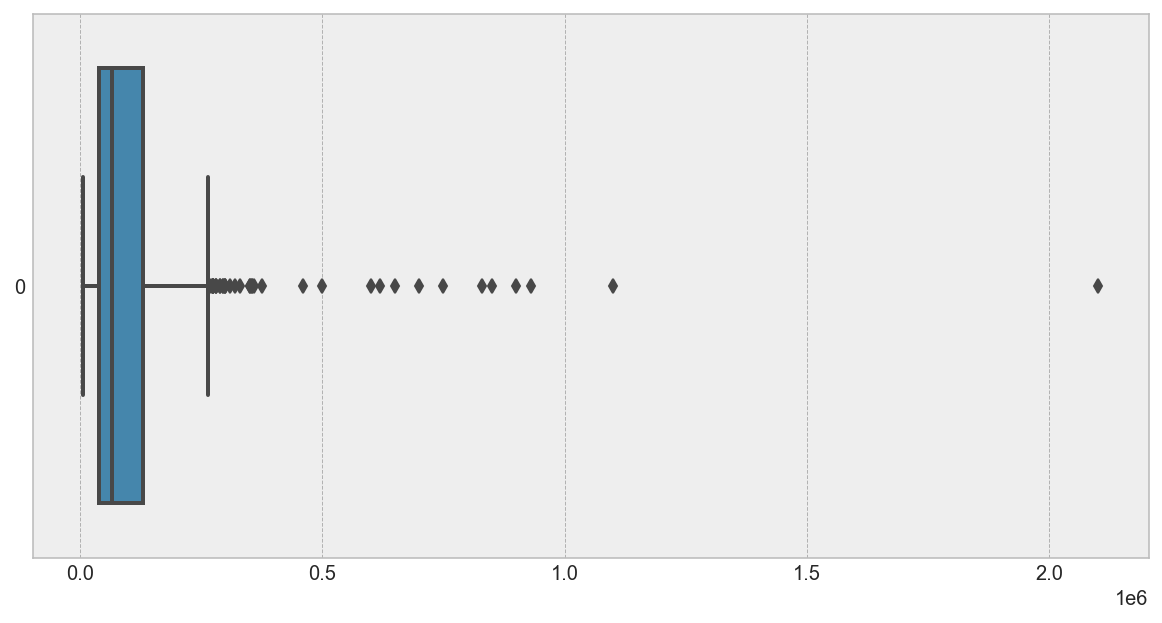

In [27]:
# Showing the outliers by boxplot for price column.
plt.figure(figsize=(10,5))

sns.boxplot(bike_cleaned.price,orient = "h" );

In [28]:
# 2. kilometers Column:
Q4,Q5,Q6 = tuple(bike_cleaned.kms_driven.quantile(q=[0.25,0.50,0.75]).values)

# Checking the missing values
print(Q4,Q5,Q6)

12387.5 25000.0 41025.0


In [29]:
# Calculating the IQR value and for calculating the LL and UL.
IQR_kms = Q6-Q4

# Checking the outliers in lowerlimit(LL).
UL_kms = Q6+1.5*IQR

# Checking the outliers in upperlimit(UL)
LL_kms = Q4-1.5*IQR

print(IQR_kms,UL_kms,LL_kms)

28637.5 176025.0 -122612.5


In [30]:
# This are the outliers in the kms column.
# There are six outliers in this kms column.

bike_cleaned[(bike_cleaned.kms_driven > UL_kms) | (bike_cleaned.kms_driven < LL_kms)]

brand sub_brand model_year owner  kms_driven   price    location  \
90     Hero     Honda       2010     2      504500   35000  Hyderabad    
174   Bajaj  Discover       2011     1      200000   50000  Hyderabad    
203   Bajaj  Discover       2009     2      999999   25000  Bangalore    
461   Bajaj   Avenger       2015     1      385000   60000  Bangalore    
574   Honda    Activa       2014     1      248438   30000     Mumbai    
758   Honda        CB       2017     1      890000   80000       Pune    
770   Honda        CB       2015     1      300000   40000       Pune    
915   Bajaj    Pulsar       2008     1      200000   10000    Chennai    
981     TVS    Scooty       2010     1      245311   14000    Chennai    
1009  Royal   Enfield       2019     1      266000  135000    Chennai    

           updated_date  
90      24 October 2022  
174   19 September 2022  
203    07 December 2022  
461     03 October 2022  
574    21 November 2022  
758    08 November 2022  
770     28 October 2022  
915    14 November 2022  
981     03 October 2022  
1009  13 September 2022

In [31]:
# Droped the outliers in the kms column.
# converting to index than to list and storing it in to an variable named as drop_list
drop_list = bike_cleaned[(bike_cleaned.kms_driven > UL_kms) | (bike_cleaned.kms_driven < LL_kms)].index.tolist()
# this code also works for drop the outliers.
bike_cleaned.drop(drop_list,axis= 0, inplace = True)

In [32]:
# After Droping the columns resetting the index using reset_index()
bike_cleaned = bike_cleaned.reset_index()

In [33]:
# Checking the coulmns.
bike_cleaned.columns

Index(['index', 'brand', 'sub_brand', 'model_year', 'owner', 'kms_driven',
       'price', 'location', 'updated_date'],
      dtype='object')

In [34]:
# Droping the index column.
bike_cleaned.drop(['index'],axis = 1,inplace = True)

In [35]:
bike_cleaned

brand sub_brand model_year owner  kms_driven  price    location  \
0        TVS    Scooty       2012     1       10000  12000  Hyderabad    
1      Bajaj    Pulsar       2010     2       50000  35000  Hyderabad    
2      Honda        CB       2017     1       59000  75000  Hyderabad    
3        TVS    Scooty       2019     1        9000  45000  Hyderabad    
4     Yamaha   Fascino       2016     1       25000  25000  Hyderabad    
...      ...       ...        ...   ...         ...    ...         ...   
1005  Yamaha   Fascino       2017     1       19000  34000    Chennai    
1006  Yamaha       Ray       2018     1        4900  50000    Chennai    
1007   Bajaj    Pulsar       2020     1       20134  90000    Chennai    
1008  Yamaha       Ray       2018     1        6475  50000    Chennai    
1009   Bajaj   Avenger       2014     1       15000  50000    Chennai    

           updated_date  
0      07 December 2022  
1      07 December 2022  
2      06 December 2022  
3      06 December 2022  
4      05 December 2022  
...                 ...  
1005  12 September 2022  
1006  12 September 2022  
1007  12 September 2022  
1008  10 September 2022  
1009  10 September 2022  

[1010 rows x 8 columns]

### Transforming outliers

In [36]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [37]:
# Normalization
minmax = MinMaxScaler()

In [38]:
bike_Norm = minmax.fit_transform(bike_cleaned.price.values.reshape(-1,1))

In [39]:
bike_Norm.min()
bike_Norm.max()

0.0

1.0

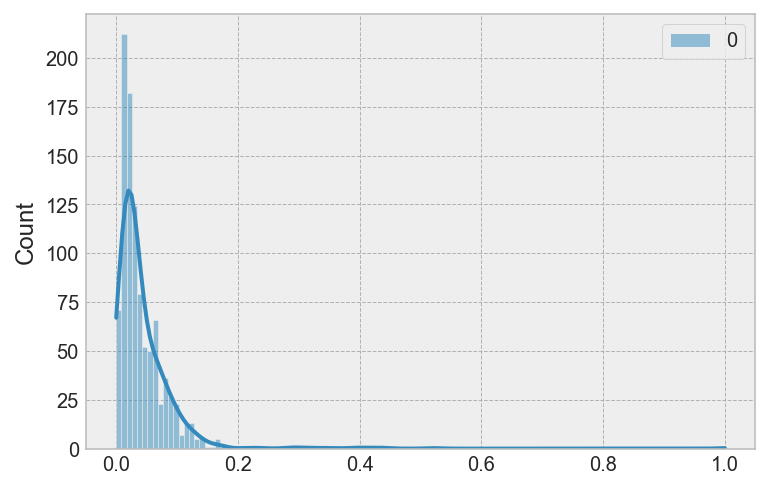

In [40]:
sns.histplot(bike_Norm, kde = True);

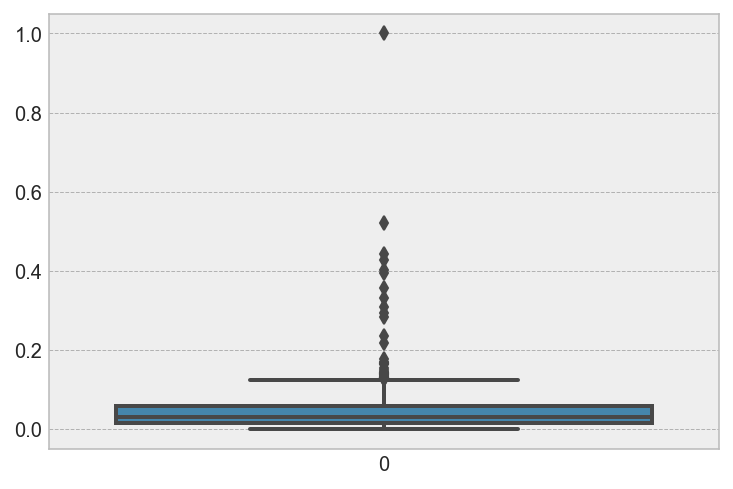

In [41]:
sns.boxplot(bike_Norm);

In [42]:
# Standardization

stand = StandardScaler()

In [43]:
bike_Standard = stand.fit_transform(bike_cleaned.price.values.reshape(-1,1))

In [44]:
round(bike_Standard.mean())
bike_Standard.std()

0

0.9999999999999999

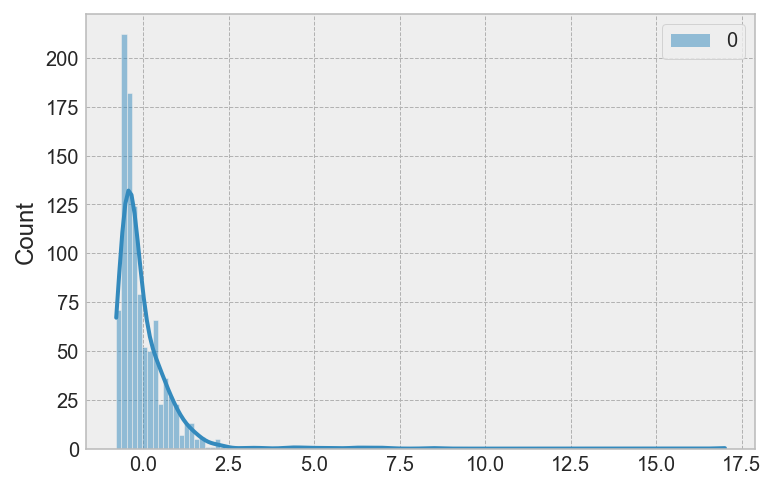

In [45]:
sns.histplot(bike_Standard, kde = True);

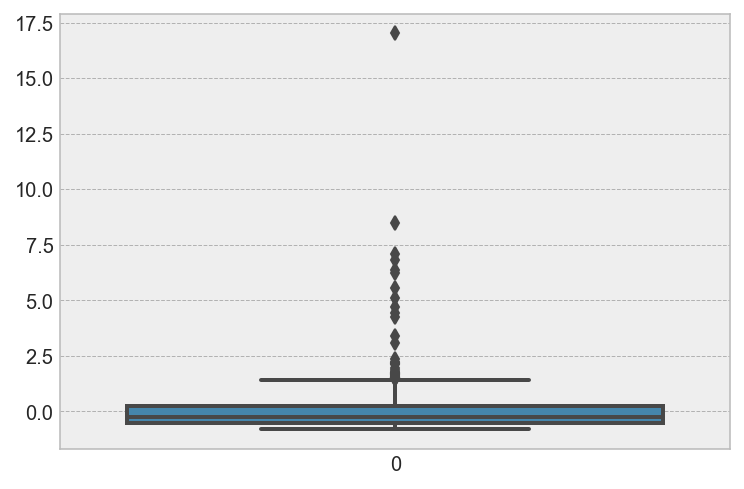

In [46]:
sns.boxplot(bike_Standard);

In [47]:
# Log Transformation

np.log(bike_cleaned.price)

0        9.392662
1       10.463103
2       11.225243
3       10.714418
4       10.126631
          ...    
1005    10.434116
1006    10.819778
1007    11.407565
1008    10.819778
1009    10.819778
Name: price, Length: 1010, dtype: float64

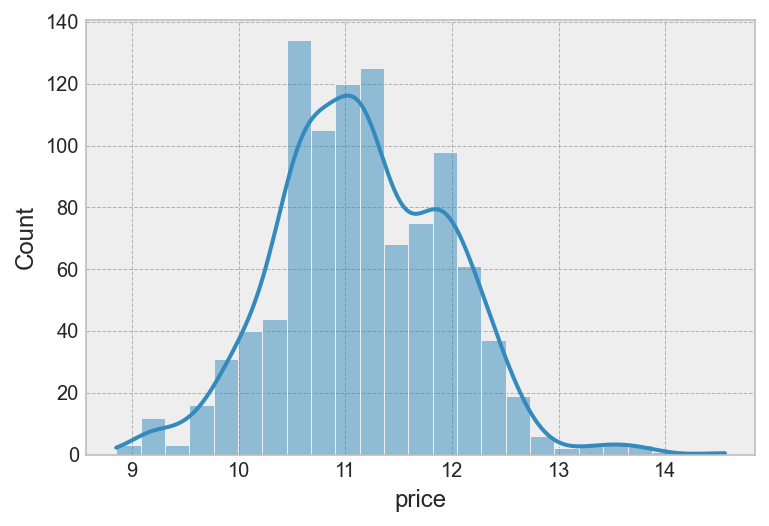

In [48]:
sns.histplot(np.log(bike_cleaned.price), kde = True);

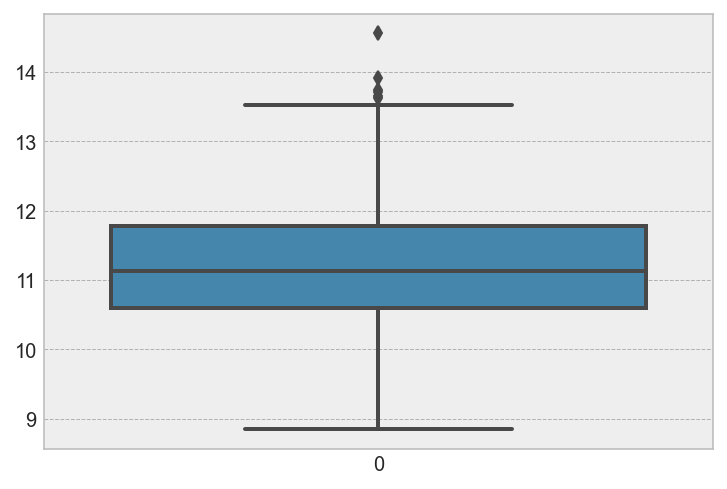

In [49]:
sns.boxplot(np.log(bike_cleaned.price));

In [50]:
# Log transformation seems to be some what fitting well for this data

# compare the variance
bike_cleaned.price.var()

np.log(bike_cleaned.price).var()

13841168715.940342

0.6352145102557748

In [51]:
# store the log  values as a new column and instead of price column we will use the price_log column for visualization.
bike_cleaned['price_log'] = np.round(np.log(bike_cleaned.price))

In [52]:
# Converting it into original values.
np.exp(bike_cleaned.price_log)

0        8103.083928
1       22026.465795
2       59874.141715
3       59874.141715
4       22026.465795
            ...     
1005    22026.465795
1006    59874.141715
1007    59874.141715
1008    59874.141715
1009    59874.141715
Name: price_log, Length: 1010, dtype: float64

In [53]:
# Cuberoot Transformation
bike_cleaned.price**(1/3)

0       22.894285
1       32.710663
2       42.171633
3       35.568933
4       29.240177
          ...    
1005    32.396118
1006    36.840315
1007    44.814047
1008    36.840315
1009    36.840315
Name: price, Length: 1010, dtype: float64

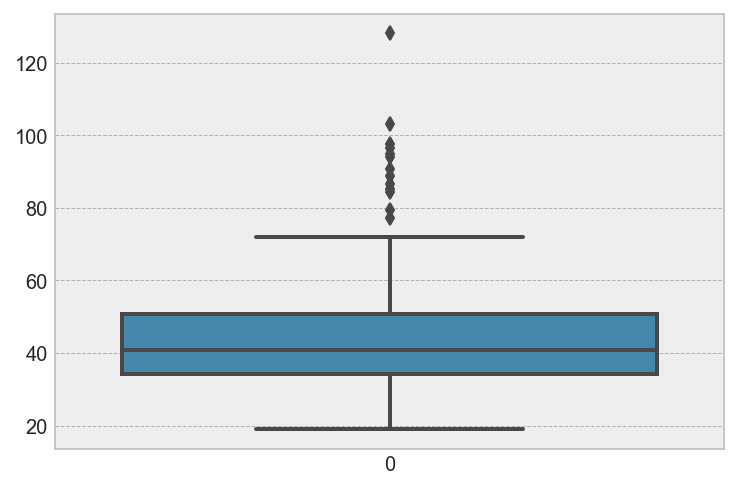

In [54]:
sns.boxplot(bike_cleaned.price**(1/3));

In [55]:
# Boxcox method

stats.boxcox(bike_cleaned.price)
x,y = stats.boxcox(bike_cleaned.price)

(array([6.91258107, 7.45231669, 7.81301859, ..., 7.89653168, 7.62348442,
        7.62348442]),
 -0.0689949944478901)

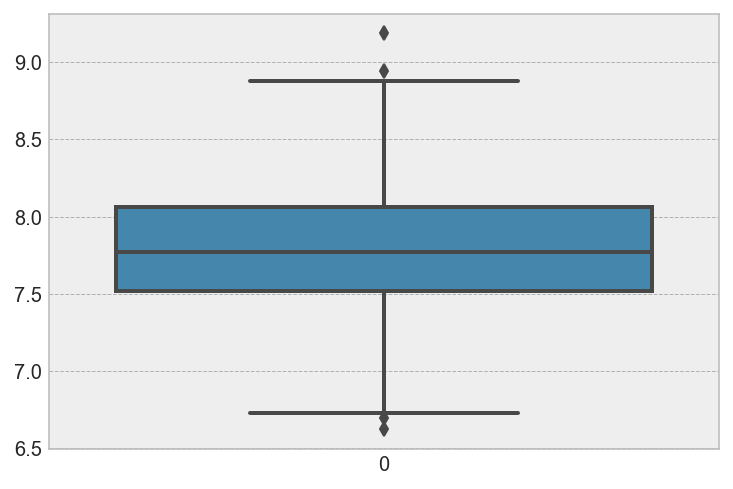

In [56]:
sns.boxplot(x);

In [57]:
# Transformation for the kms column.

bike_Norm = minmax.fit_transform(bike_cleaned.kms_driven.values.reshape(-1,1))

In [58]:
bike_Norm.min()
round(bike_Norm.max())

0.0

1

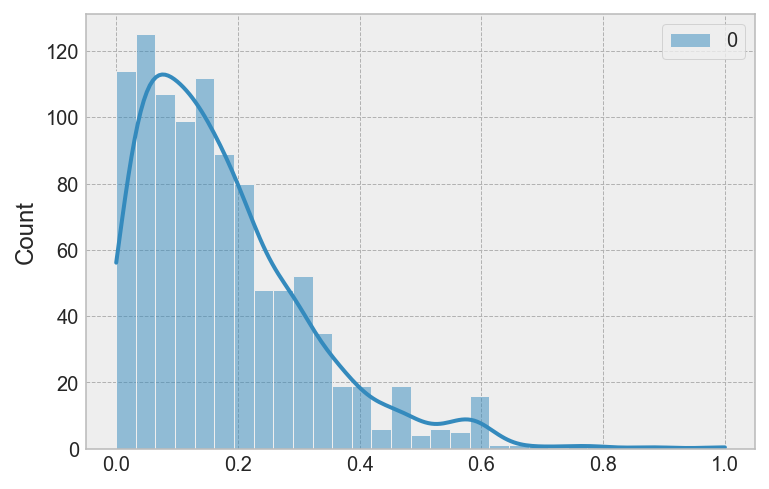

In [59]:
sns.histplot(bike_Norm, kde = True);

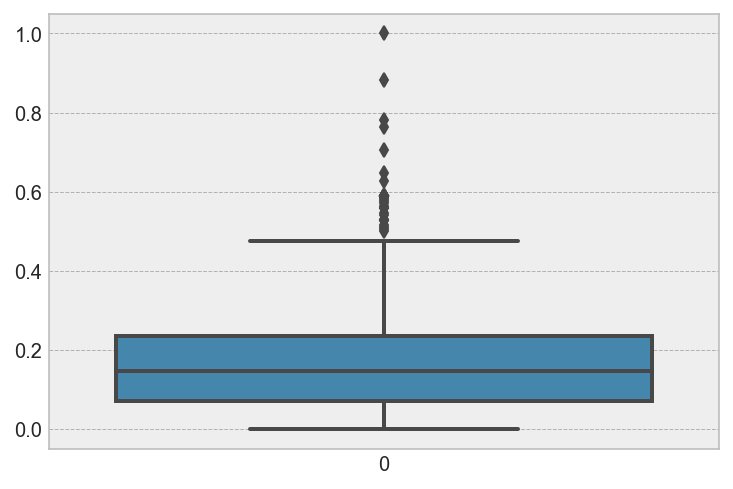

In [60]:
sns.boxplot(bike_Norm);

In [61]:
# Standardization

stand = StandardScaler()

In [62]:
bike_Stand = stand.fit_transform(bike_cleaned.kms_driven.values.reshape(-1,1))

In [63]:
round(bike_Stand.mean())
bike_Stand.std()

0

1.0

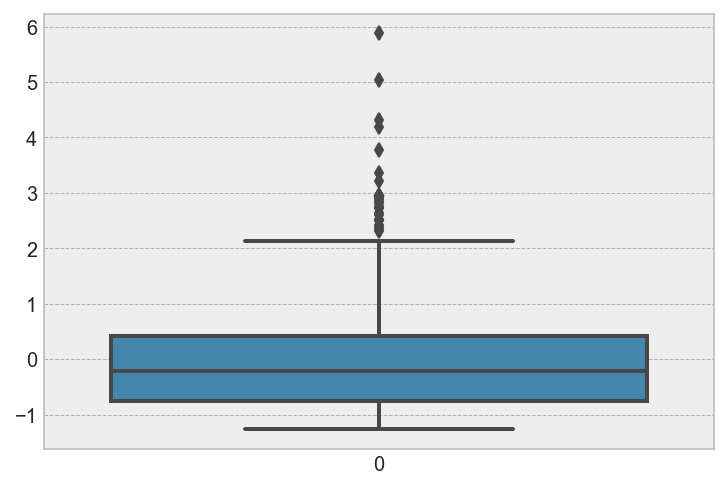

In [64]:
sns.boxplot(bike_Stand);

In [65]:
np.log(bike_cleaned.kms_driven)

0        9.210340
1       10.819778
2       10.985293
3        9.104980
4       10.126631
          ...    
1005     9.852194
1006     8.496990
1007     9.910165
1008     8.775704
1009     9.615805
Name: kms_driven, Length: 1010, dtype: float64

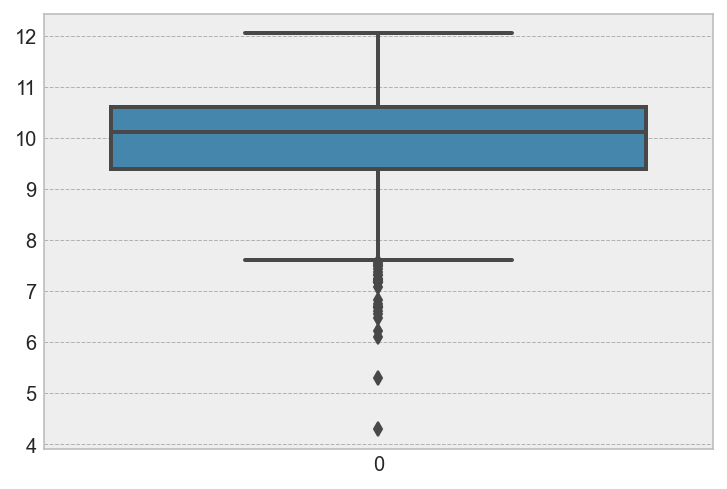

In [66]:
sns.boxplot(np.log(bike_cleaned.kms_driven));

In [67]:
# Cuberoot Transformation
np.round(bike_cleaned.kms_driven**(1/3))

0       22.0
1       37.0
2       39.0
3       21.0
4       29.0
        ... 
1005    27.0
1006    17.0
1007    27.0
1008    19.0
1009    25.0
Name: kms_driven, Length: 1010, dtype: float64

In [68]:
bike_cleaned['kms_cube'] = np.round(bike_cleaned.kms_driven**(1/3))

In [69]:
# 2. kilometers Column:
Q7,Q8,Q9 = tuple(bike_cleaned.kms_driven.quantile(q=[0.25,0.50,0.75]).values)

# Checking the missing values
print(Q7,Q8,Q9)

12000.0 24900.0 40000.0


In [70]:
# Calculating the IQR value and for calculating the LL and UL.
IQR_cube = Q9-Q7

# Checking the outliers in lowerlimit(LL).
UL_cube = Q9+1.5*IQR

# Checking the outliers in upperlimit(UL)
LL_cube = Q7-1.5*IQR

print(LL_cube,IQR_cube,UL_cube)

-123000.0 28000.0 175000.0


In [71]:
bike_cleaned[(bike_cleaned.kms_cube > UL_cube) | (bike_cleaned.kms_cube < LL_cube)]

Empty DataFrame
Columns: [brand, sub_brand, model_year, owner, kms_driven, price, location, updated_date, price_log, kms_cube]
Index: []

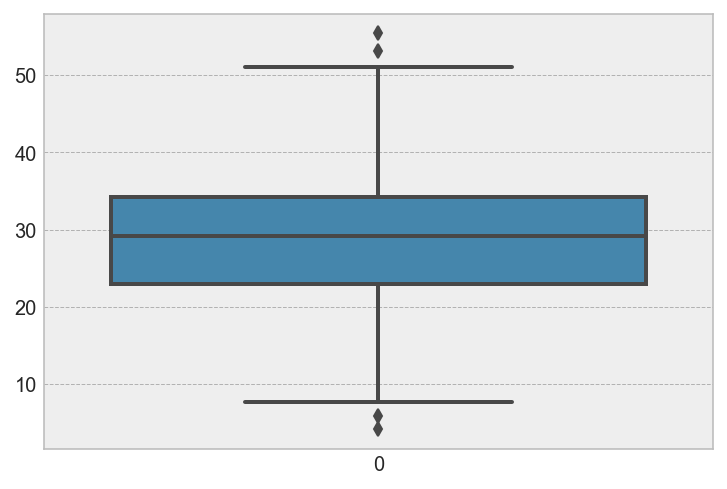

In [72]:
sns.boxplot(bike_cleaned.kms_driven**(1/3));

In [73]:
# Boxcox method

stats.boxcox(bike_cleaned.kms_driven)
x,y = stats.boxcox(bike_cleaned.kms_driven)

(array([ 64.04460435, 112.67408218, 119.34882768, ...,  81.98701951,
         54.864238  ,  73.91863236]),
 0.33908595669789937)

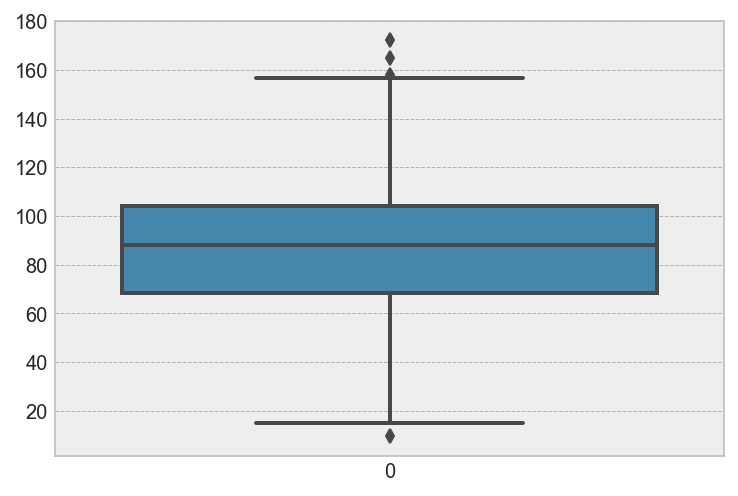

In [74]:
sns.boxplot(x);

## Data Analysis

### Univariate Analysis

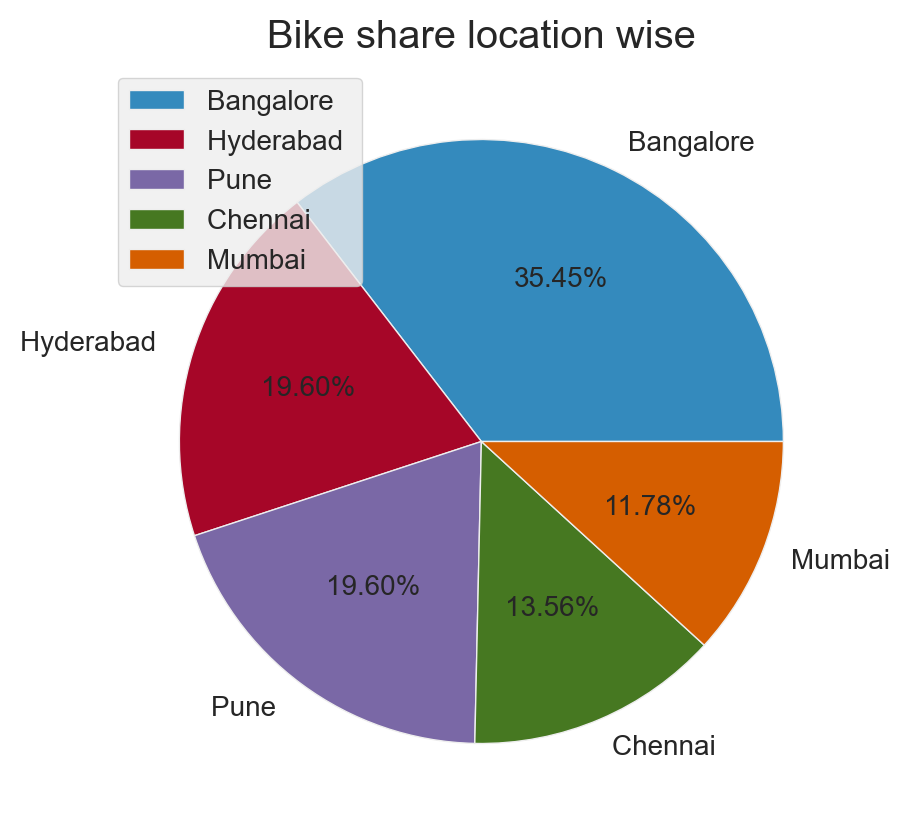

In [75]:
# This is pie plot shows share of the selling bikes location-wise.
plt.figure(figsize=(7,5), dpi = 100)
plt.pie(x = bike_cleaned.location.value_counts().values,
        labels = bike_cleaned.location.value_counts().index,autopct = '%.2f%%')
plt.title('Bike share location wise')
plt.legend(loc = 'upper left')
plt.show();

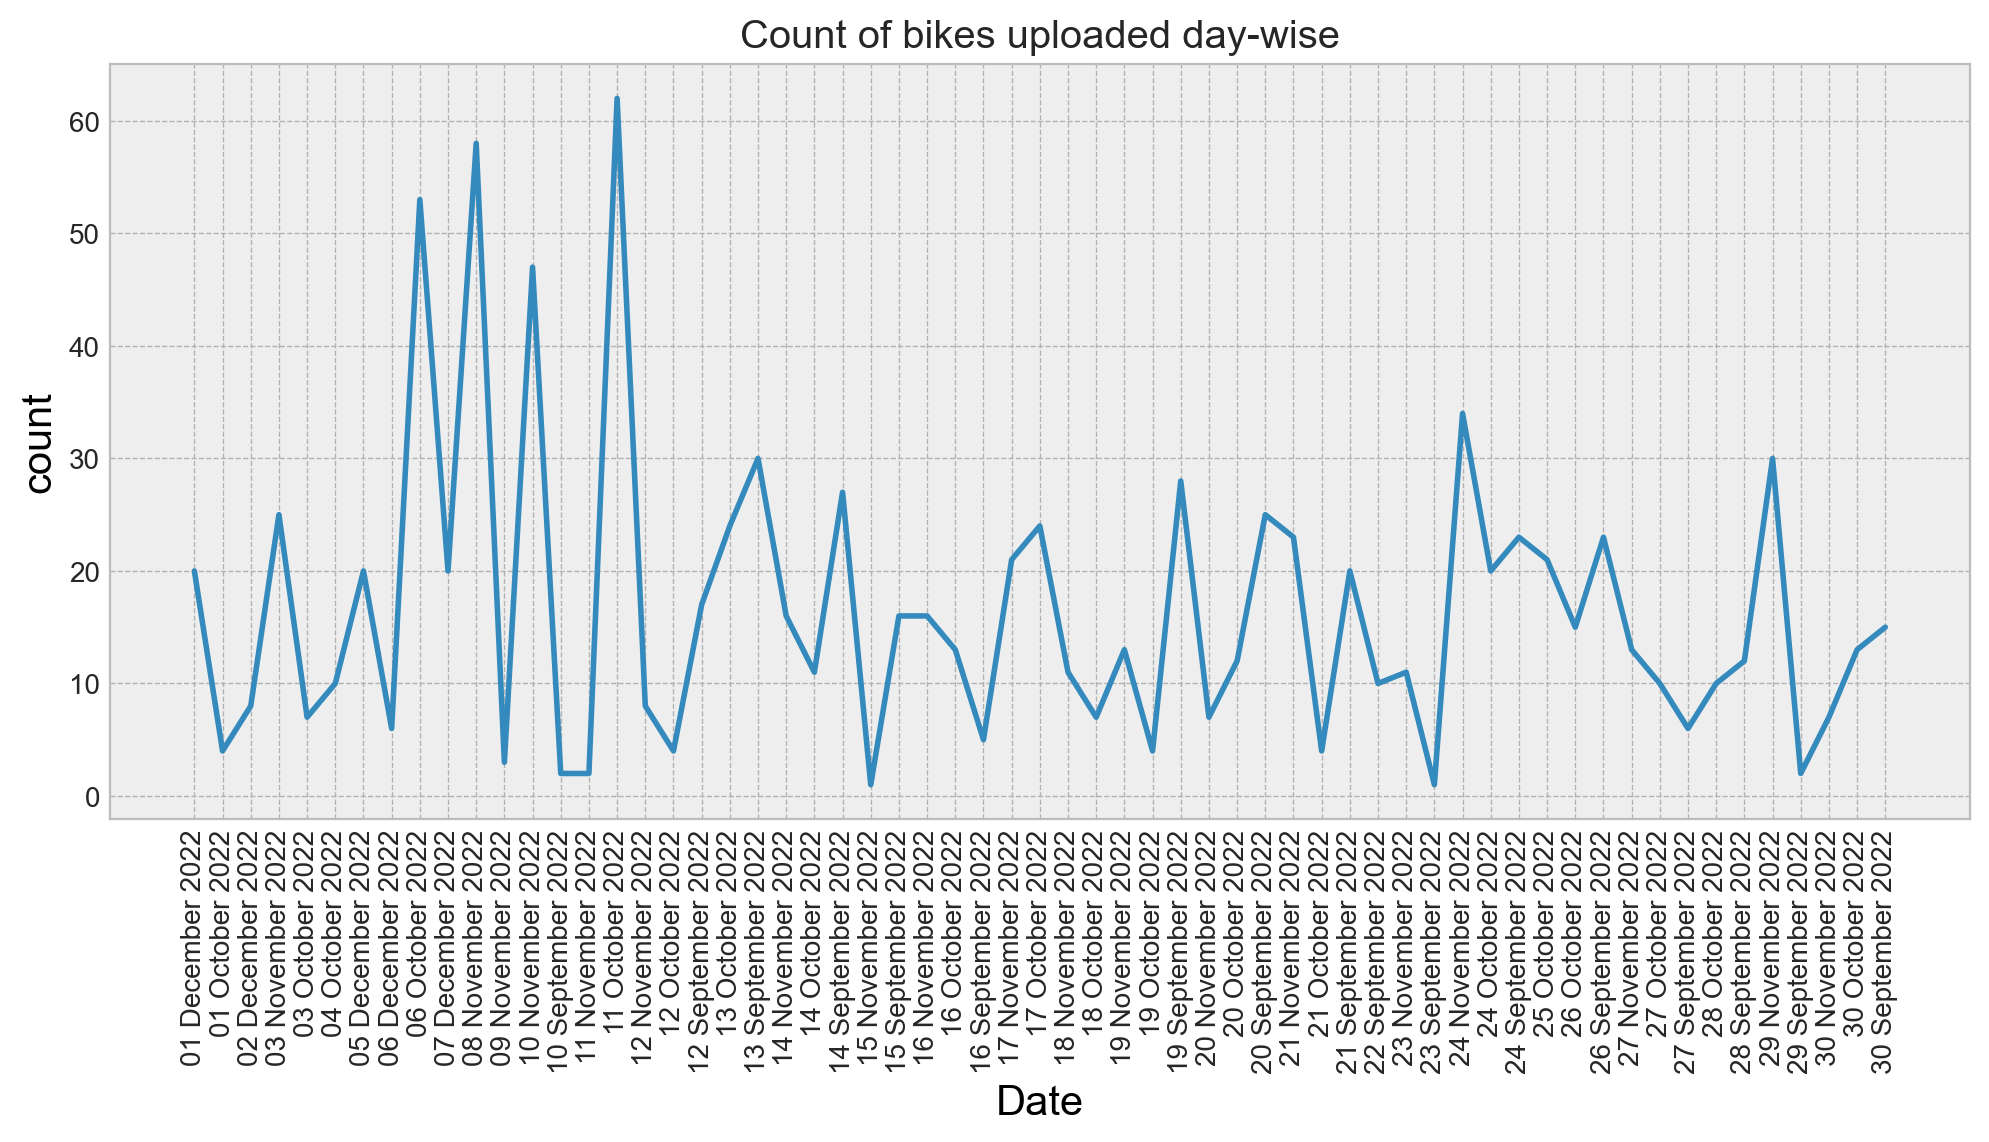

In [76]:
# This is lineplot to show the no.of.bikes uploaded day-wise with seaborn.
plt.figure(figsize=(12,5), dpi = 100)
sns.lineplot(x = bike_cleaned.updated_date.value_counts().index,
             y = bike_cleaned.updated_date.value_counts().values)
plt.title('Count of bikes uploaded day-wise')
plt.xlabel('Date',fontsize = 15, color = 'black')
plt.ylabel('count',fontsize = 15, color = 'black')
plt.xticks(list(bike_cleaned.updated_date.value_counts().index), rotation = 90); # manage x-axis values

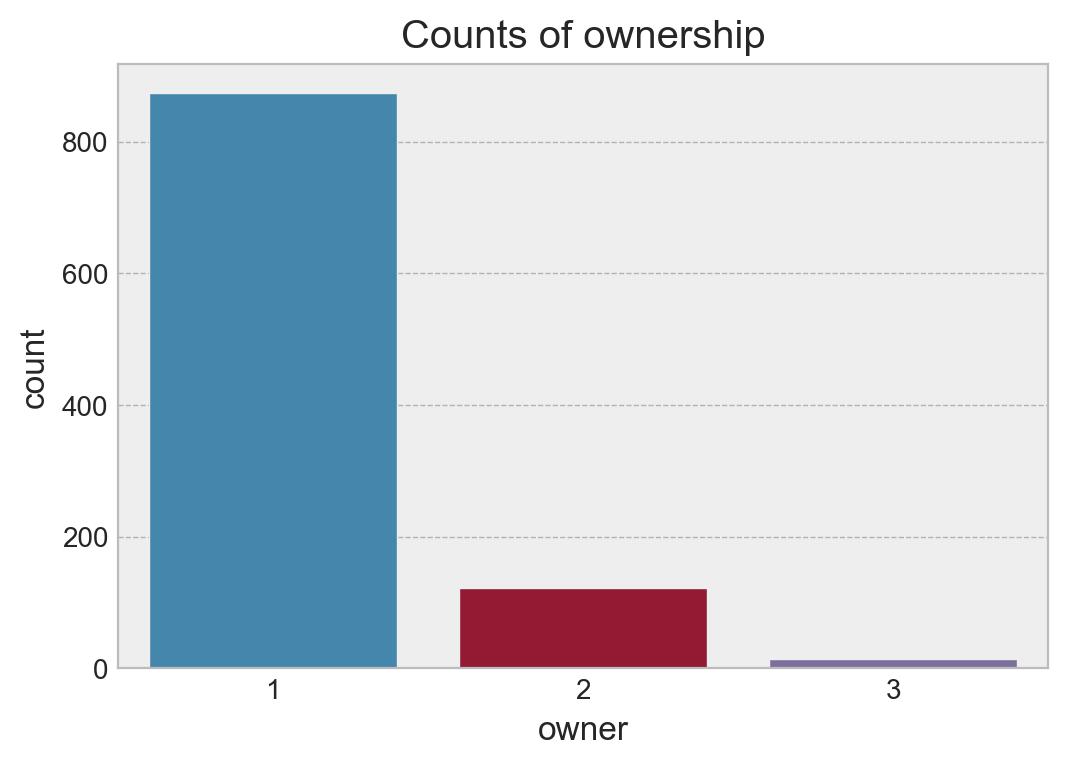

In [77]:
# count plot for owners column.
plt.figure(figsize=(6,4), dpi = 100)
sns.countplot(x = bike_cleaned.owner)
plt.title('Counts of ownership');

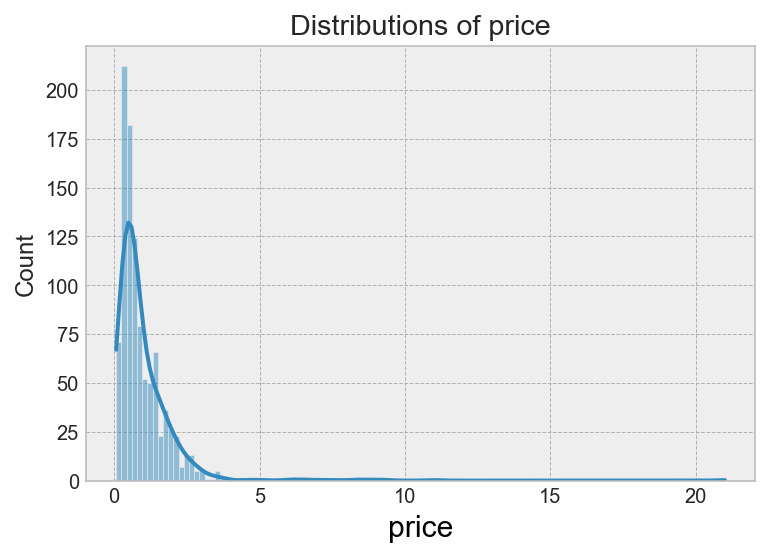

In [78]:
sns.histplot(bike_cleaned.price.values/100000, kde=True)
plt.xlabel('price',fontsize = 15, color = 'black')
plt.title('Distributions of price');

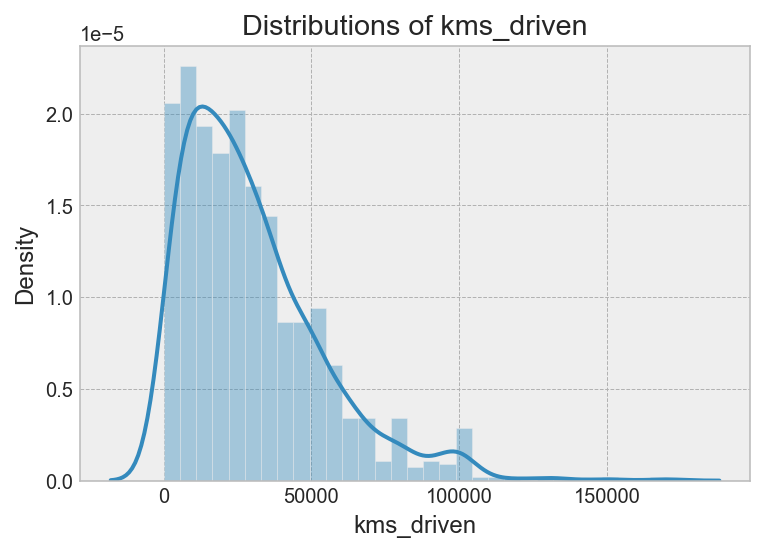

In [79]:
sns.distplot(bike_cleaned.kms_driven)
plt.title('Distributions of kms_driven');

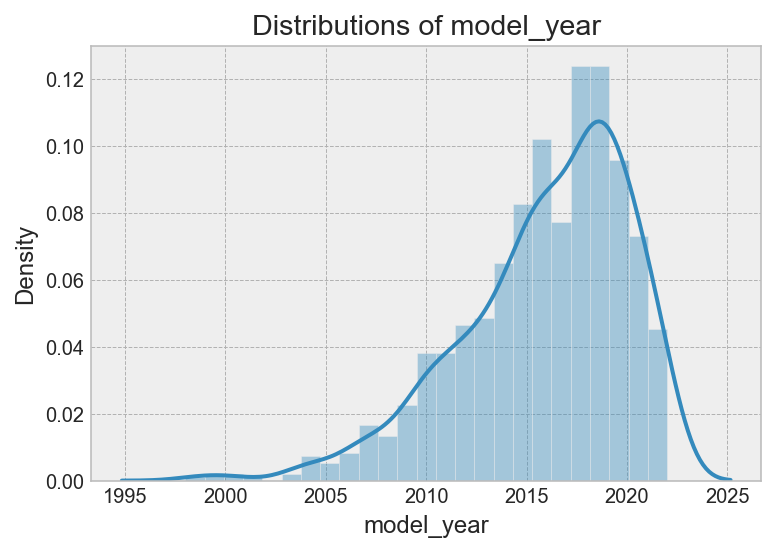

In [80]:
sns.distplot(bike_cleaned.model_year)
plt.title('Distributions of model_year');

In [81]:
# This outliers data storing in the variable is premium_bikes.
premium_bikes = bike_cleaned[(bike_cleaned.price > UL)]

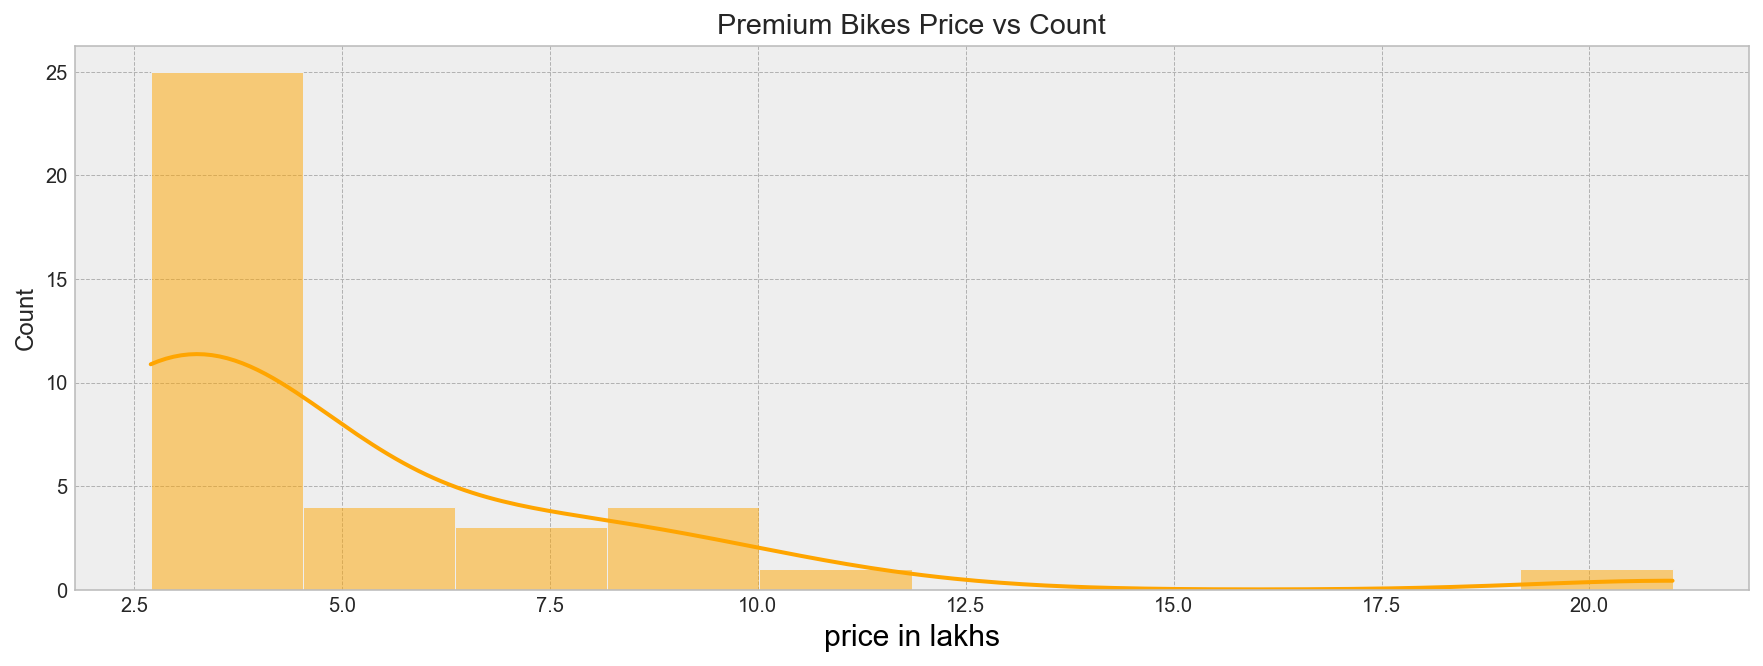

In [82]:
# These is histplot for premium bikes.
plt.figure(figsize=(15,5))
sns.histplot(x=premium_bikes.price.values/100000, color = 'orange', kde= True,legend=True)
plt.xlabel('price in lakhs',fontsize = 15, color = 'black')
plt.title('Premium Bikes Price vs Count');

In [83]:
# these graph is using plotly
fig = px.histogram(premium_bikes,x='price', title = 'Premium Bikes Price vs Count')
fig.show()

### Bivariate Analysis

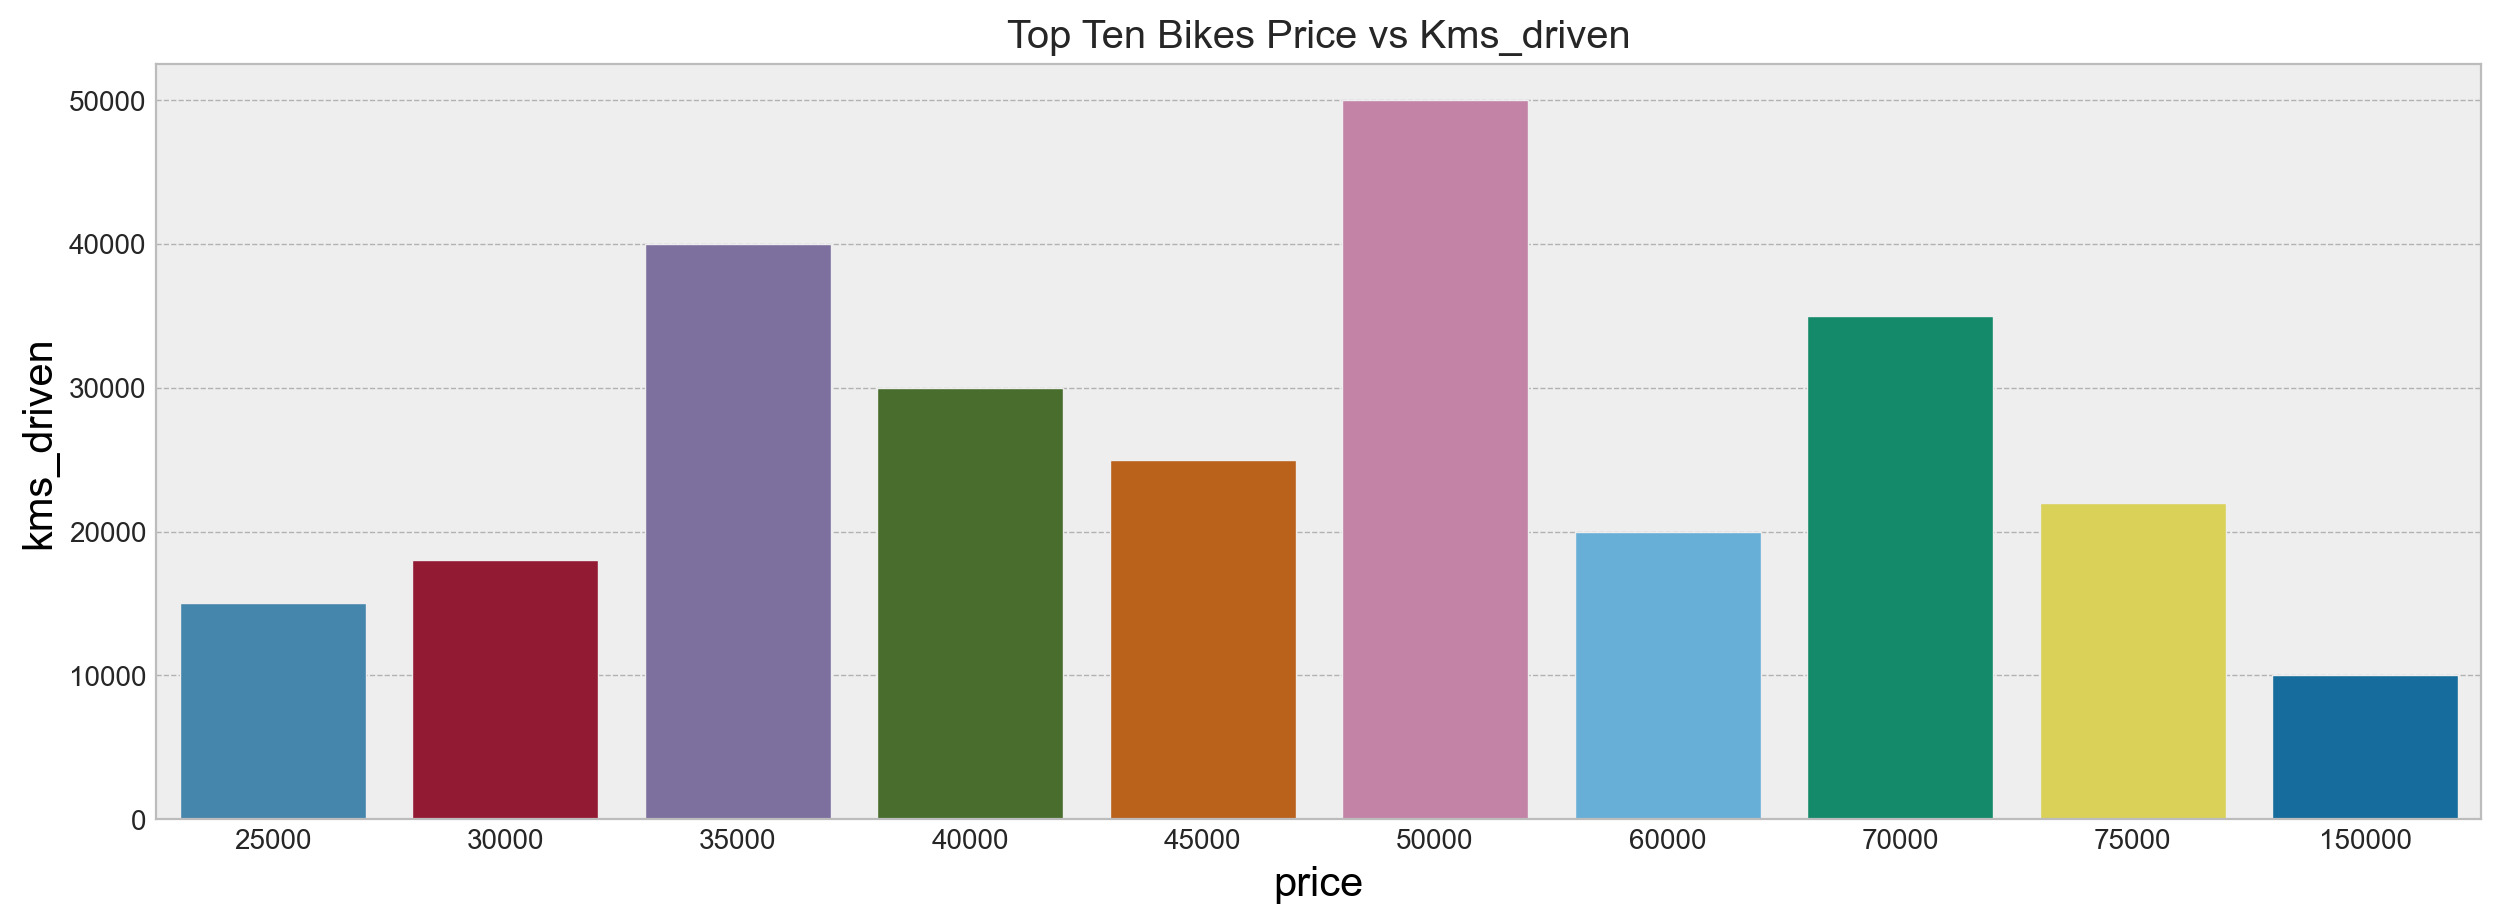

In [84]:
# this is bar plot for the price vs kms_driven.
plt.figure(figsize=(15,5), dpi = 100)
sns.barplot(x=bike_cleaned.price.value_counts()[0:10].index,
            y=bike_cleaned.kms_driven.value_counts()[0:10].index, ci = False)
plt.xlabel('price',fontsize = 15, color = 'black')
plt.ylabel('kms_driven',fontsize = 15, color = 'black')
plt.title('Top Ten Bikes Price vs Kms_driven');

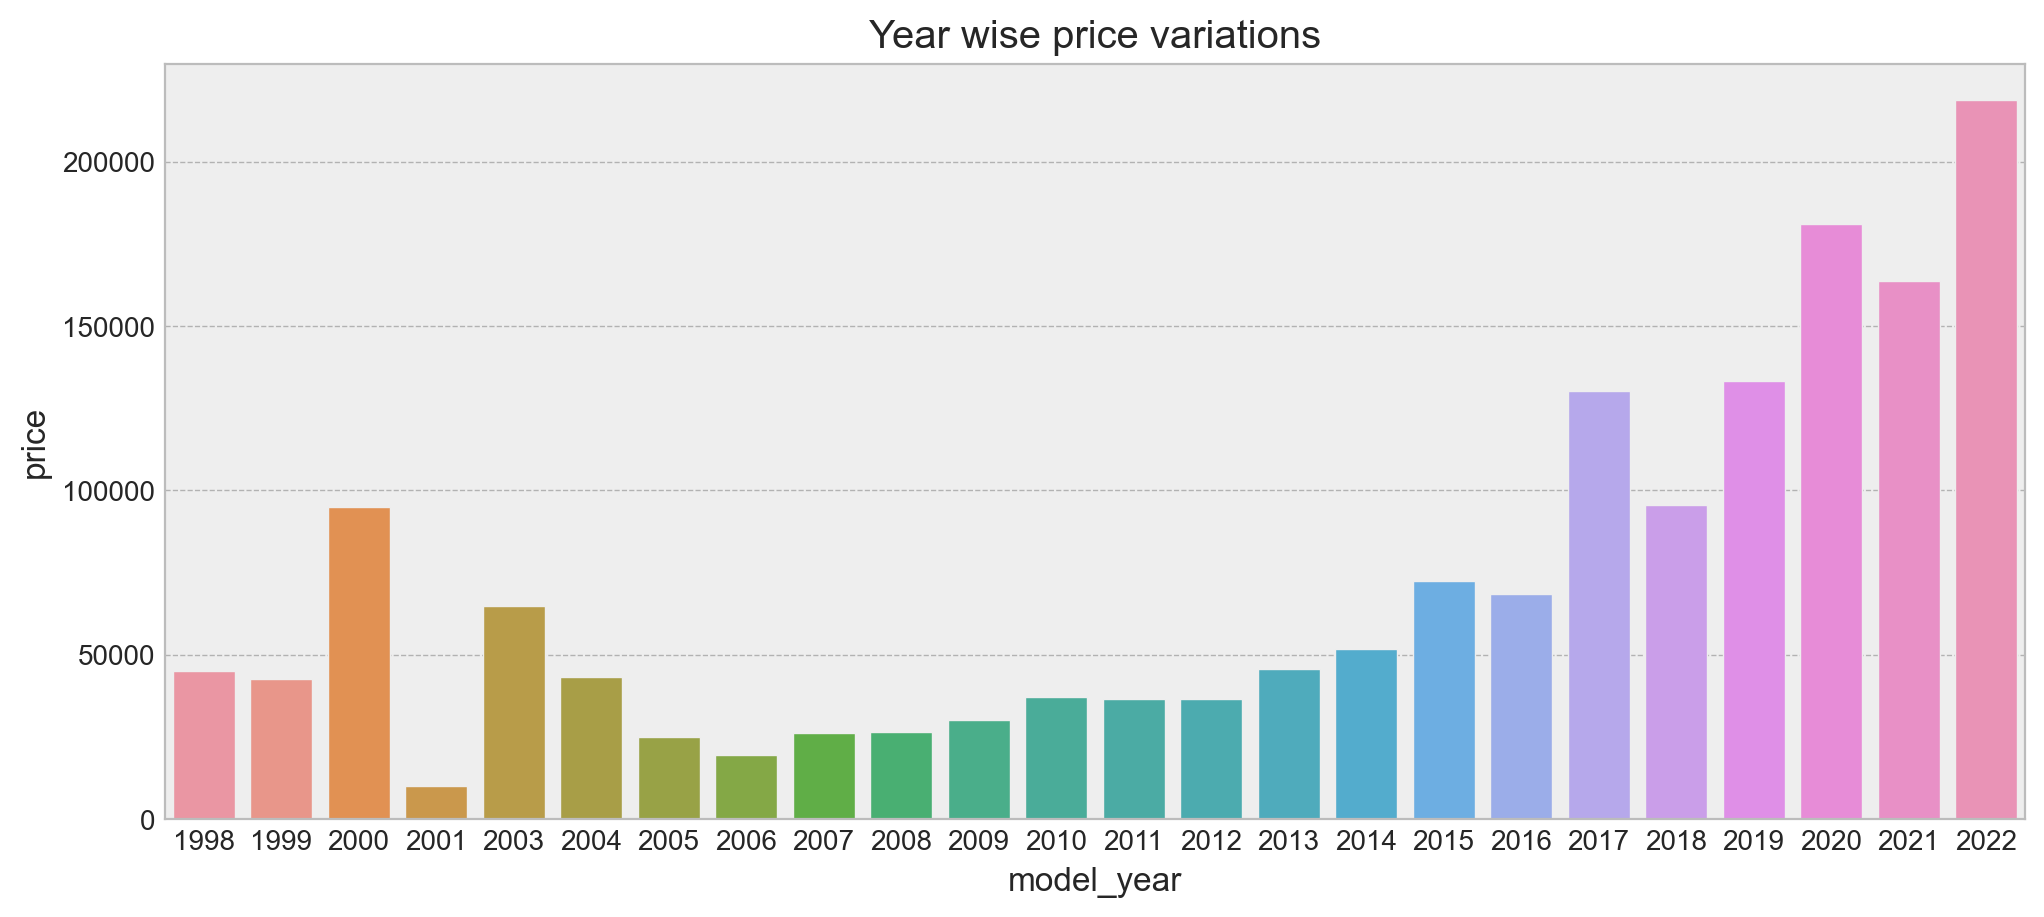

In [85]:
# This is bar plot for the price vs model_year.
plt.figure(figsize=(12,5), dpi = 100)
sns.barplot(x=bike_cleaned.model_year, y=bike_cleaned.price, ci = False)
plt.title('Year wise price variations');

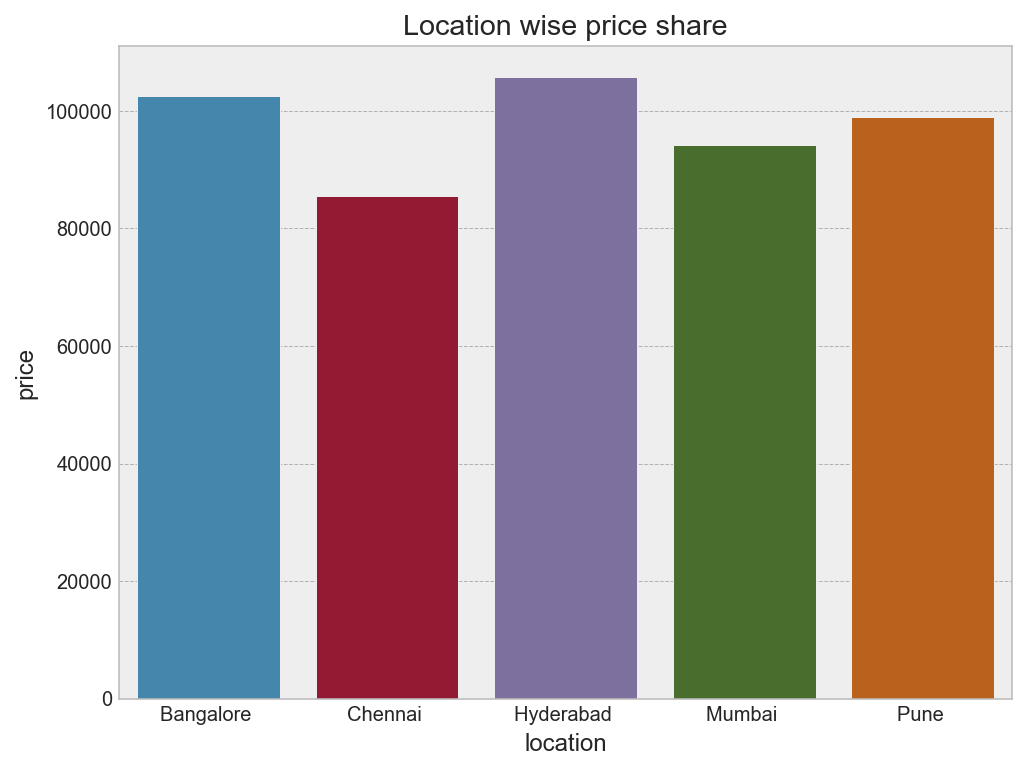

In [86]:
# This is bar plot for the brand, price, owner columns.
plt.figure(figsize=(8,6))
sns.barplot(x = bike_cleaned.location, y = bike_cleaned.price, ci = False)
plt.title('Location wise price share');

In [87]:
fig = px.scatter(bike_cleaned,x='brand',y='location', title = 'Bike Brands availablity location wise')
fig.show()

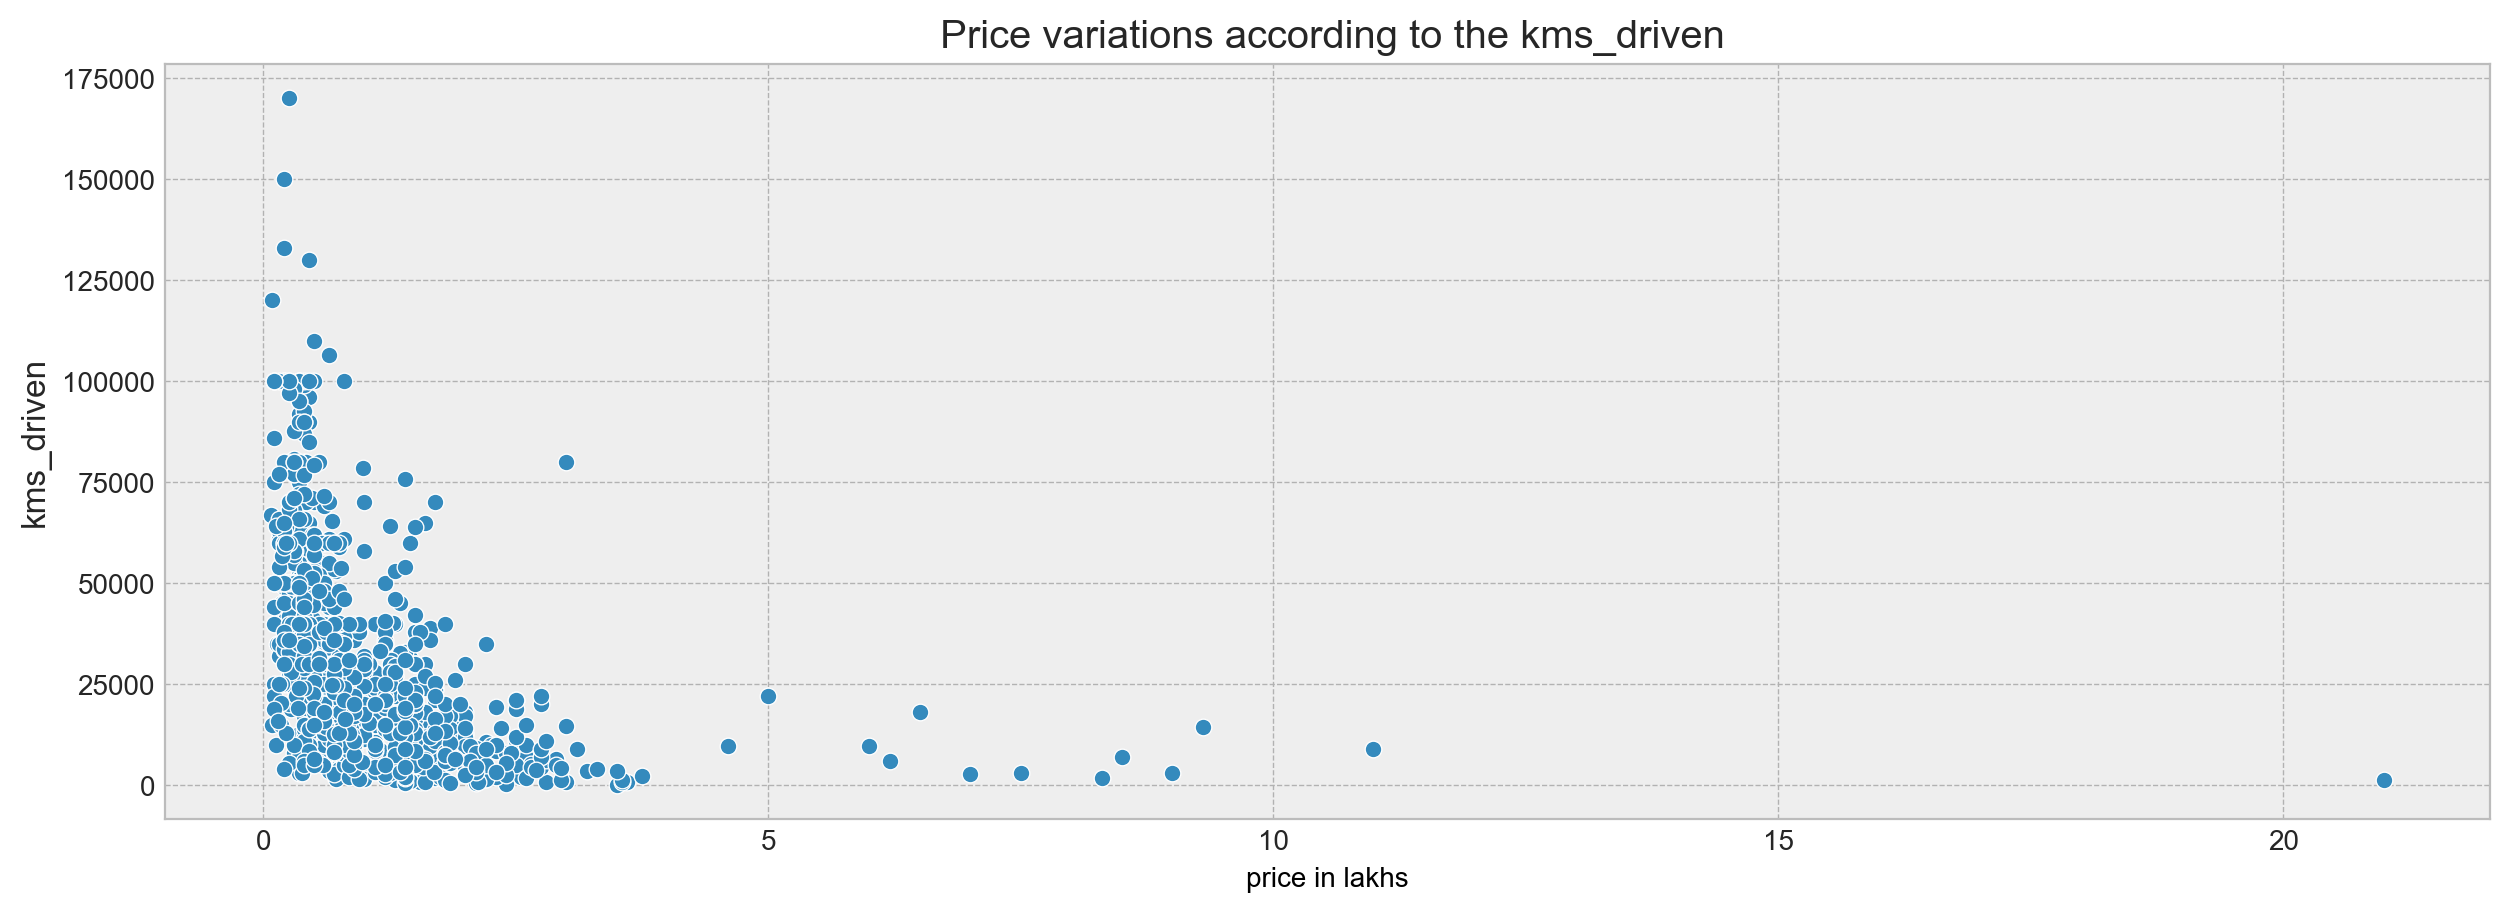

In [88]:
# this is scatter plot for the price vs kms_driven.
plt.figure(figsize=(15,5), dpi = 100)
sns.scatterplot(x=bike_cleaned.price.values/100000,y=bike_cleaned.kms_driven)
plt.xlabel('price in lakhs',fontsize = 10, color = 'black')
plt.title(' Price variations according to the kms_driven');

In [89]:
fig = px.scatter(bike_cleaned, x="price", y="kms_driven", title = 'Price variations according to the kms_driven')
fig.show()

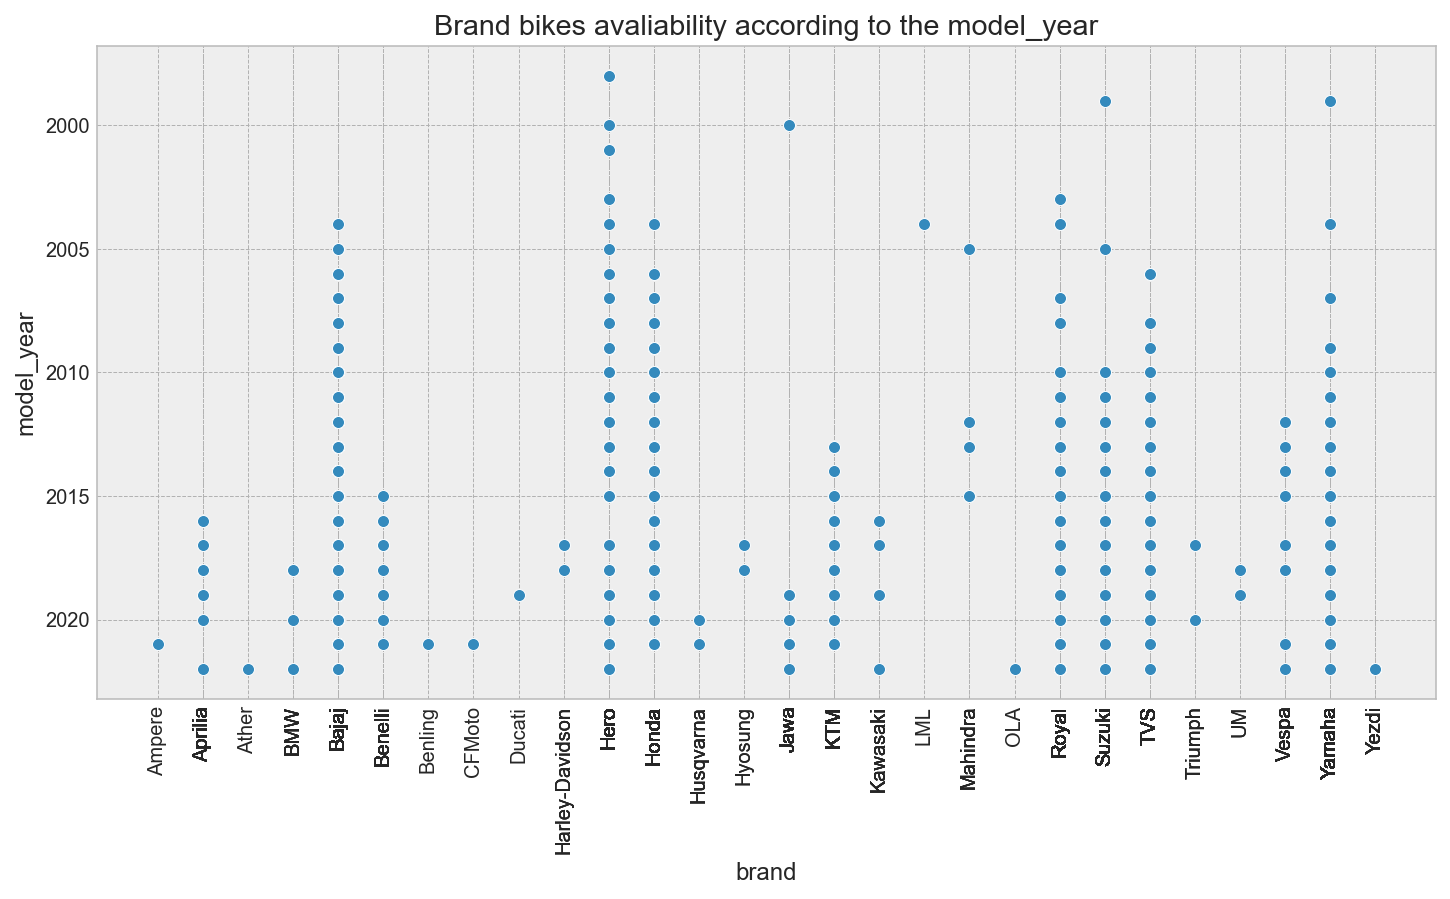

In [90]:
# This is scatter plot for the brand vs model_year.
plt.figure(figsize=(12,6))
sns.scatterplot(x= 'brand', y= 'model_year', data = bike_cleaned)
plt.xticks(bike_cleaned.brand, rotation = 90)
plt.title('Brand bikes avaliability according to the model_year');

In [91]:
fig = px.scatter(bike_cleaned,x='brand',y='model_year', title = 'Brand bikes avaliability according to the model_year')
fig.show()

### Multivariate Analysis

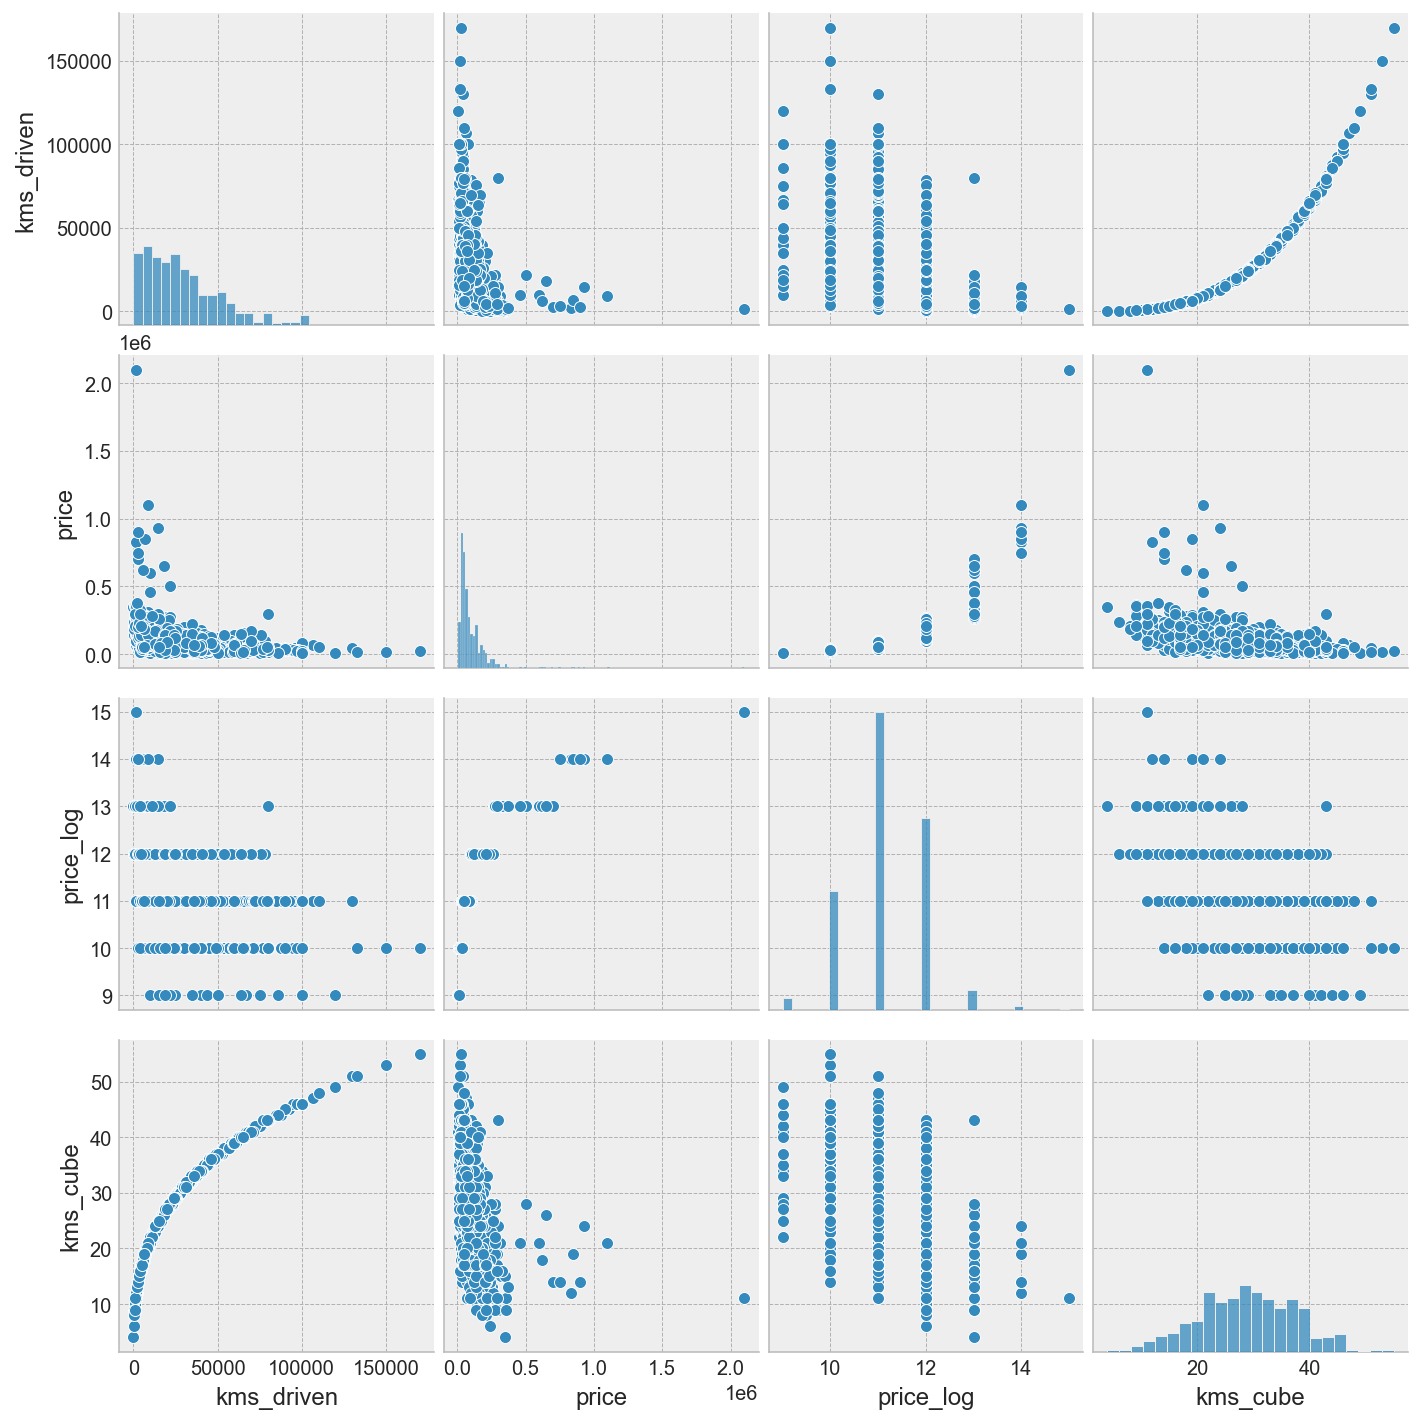

In [92]:
# This is pair plot for the all the numerical columns.
sns.pairplot(bike_cleaned);

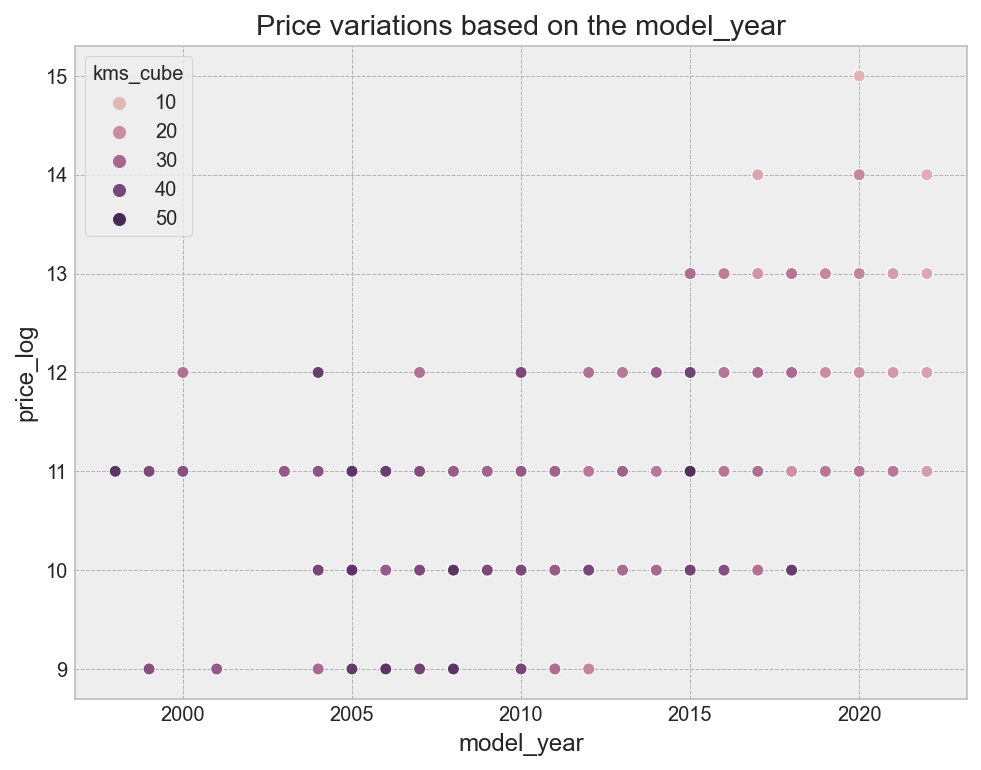

In [93]:
# This is scatter plot for the model_year vs price_log.
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'model_year', y ='price_log',hue = 'kms_cube', data = bike_cleaned)
plt.title('Price variations based on the model_year');

In [94]:
# this scatter plot shows multivariate using plotly.
import plotly.offline as pyo
from plotly.offline import init_notebook_mode
fig = px.scatter(bike_cleaned, x="model_year", y="price_log", color='kms_cube', title='ownership based on the price and model_year')
fig.show()

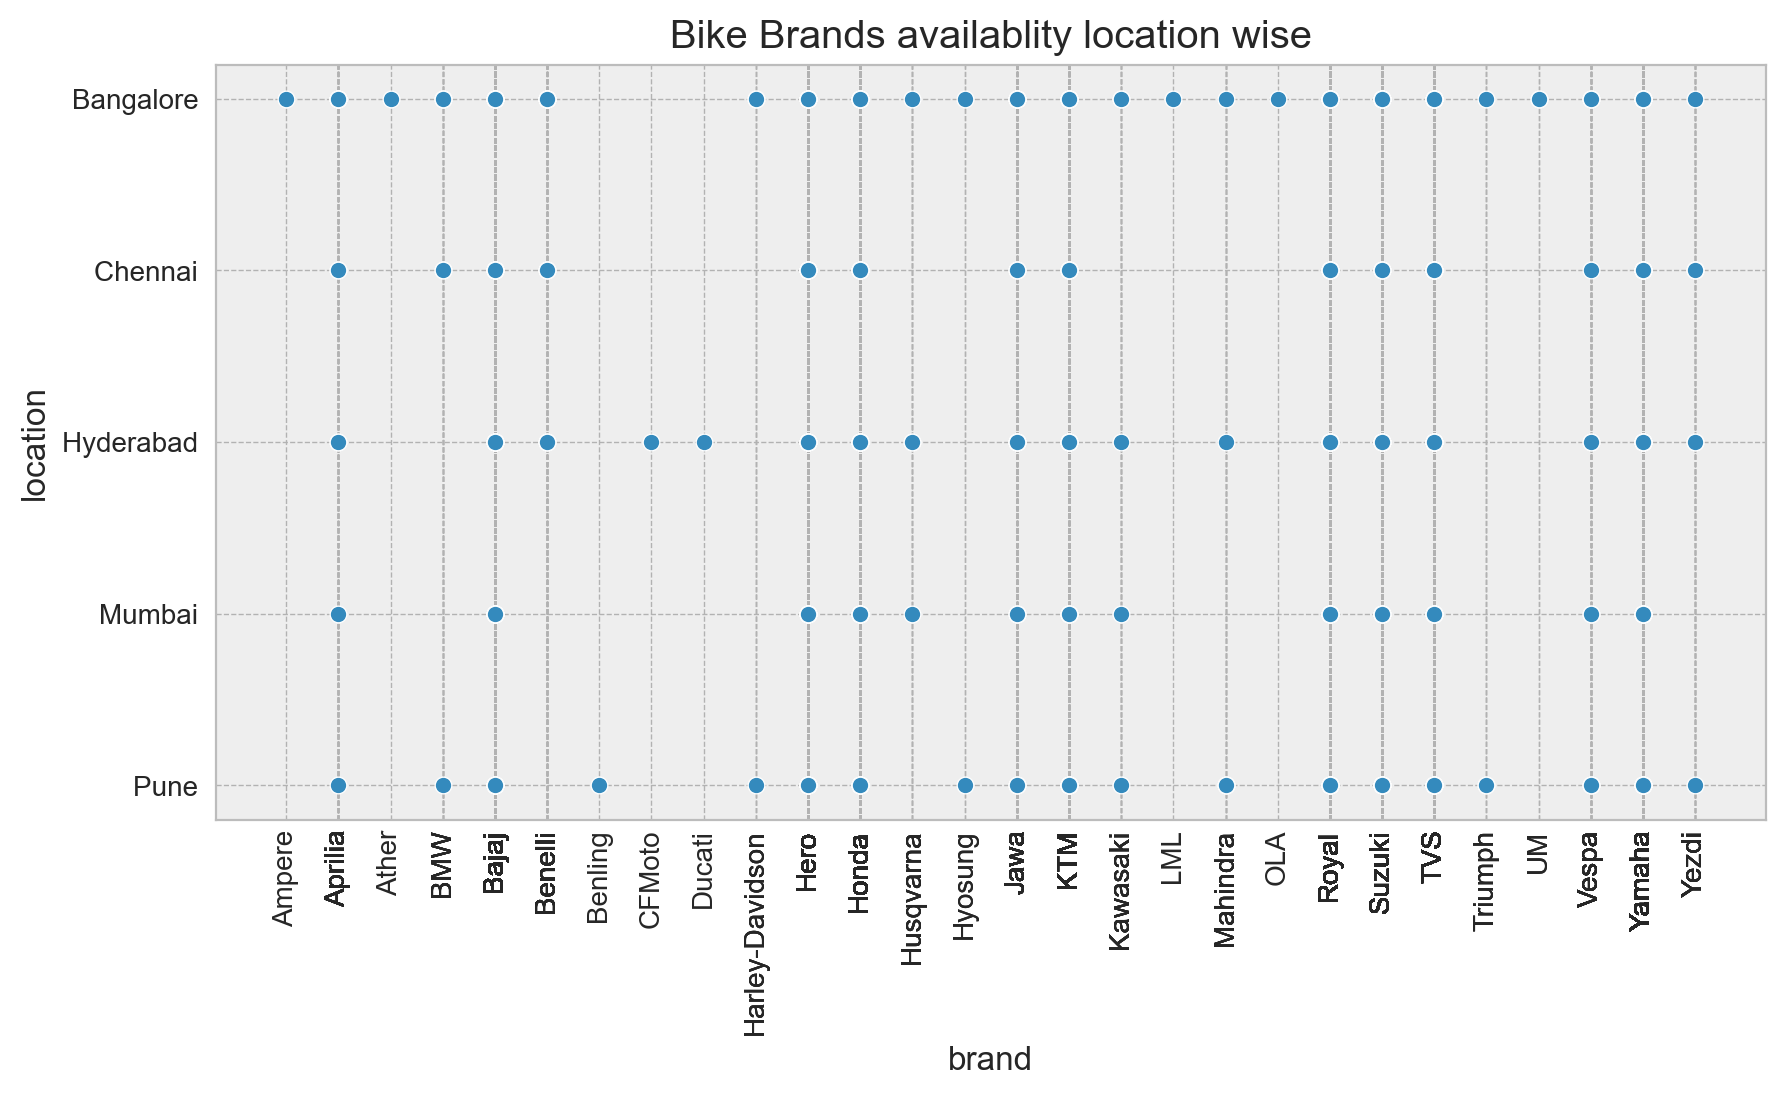

In [95]:
# this is scatter plot for the model_year vs price_log.
plt.figure(figsize=(10,5), dpi = 100)
sns.scatterplot(x=bike_cleaned.brand,y=bike_cleaned.location)
plt.xticks(bike_cleaned.brand, rotation = 90);
plt.title('Bike Brands availablity location wise');

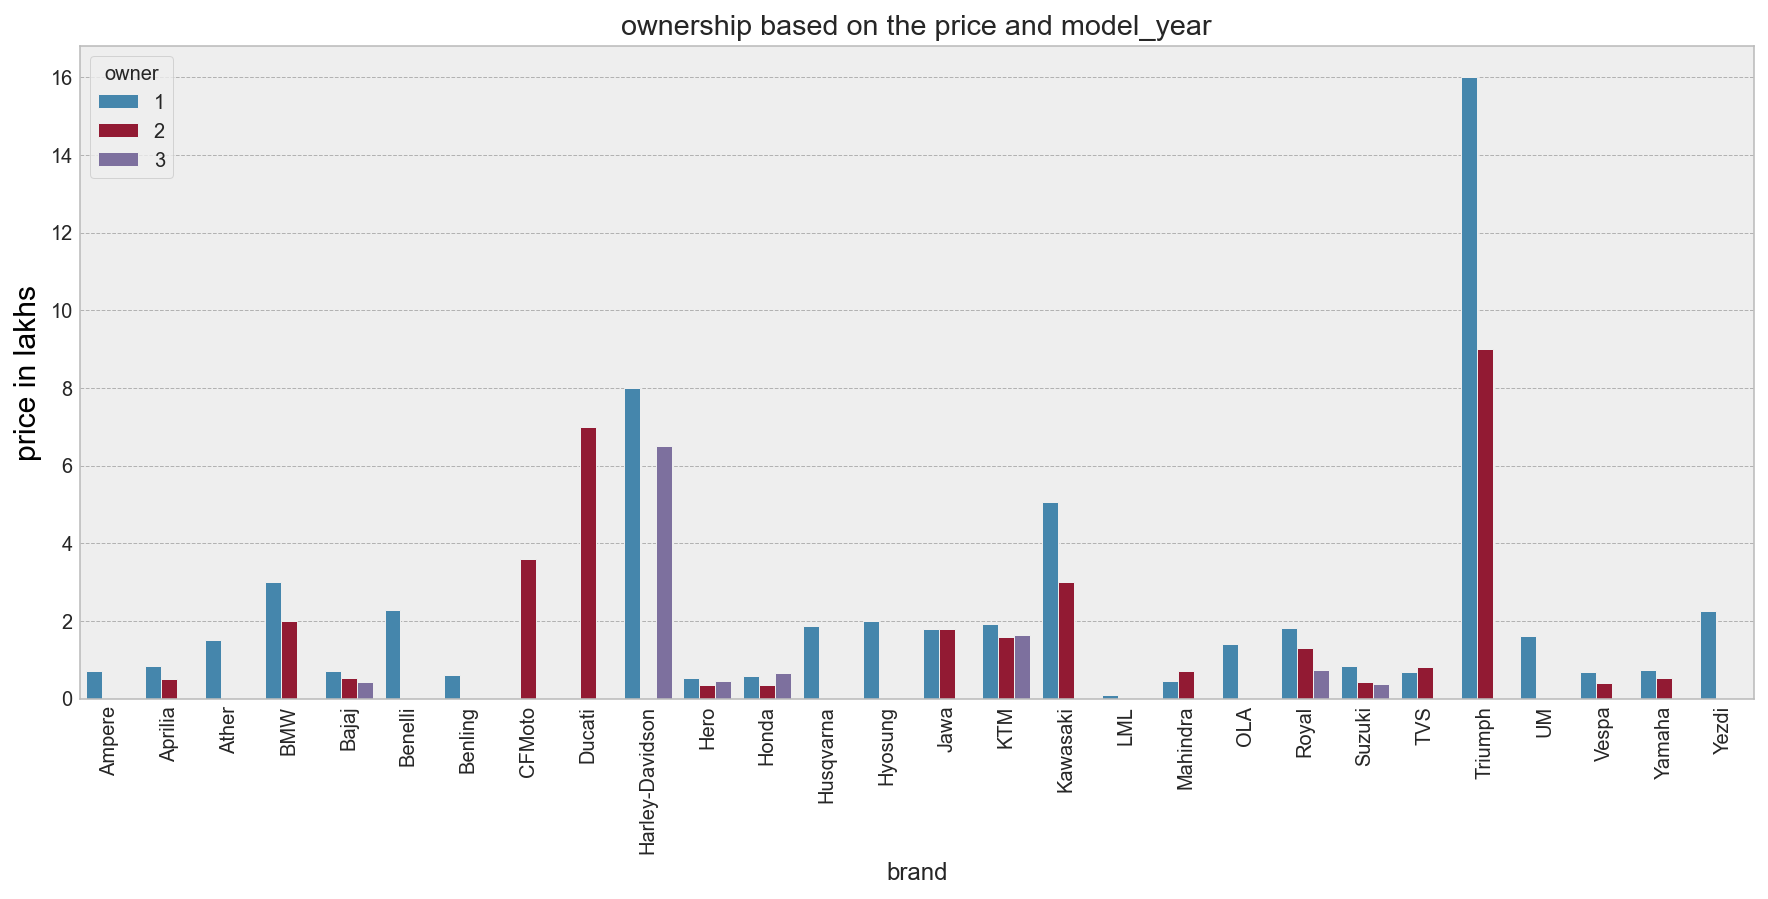

In [96]:
# This is bar plot for the brand, price, owner columns.
plt.figure(figsize=(15,6))
sns.barplot(y = bike_cleaned.price.values/100000, x = bike_cleaned.brand, ci = False, 
            hue = bike_cleaned.owner, orient='v')
plt.xticks(rotation = 90)
plt.ylabel('price in lakhs',fontsize = 15, color = 'black')
plt.title('ownership based on the price and model_year');

In [97]:
fig = px.bar(bike_cleaned,x = 'price',y = 'brand',color='owner', title = 'ownership based on the price and brand')
fig.show()

In [98]:
fig = px.scatter(bike_cleaned, x="brand", y="location", color='owner', 
                 title = 'ownership based on the location and brand')
fig.show()

In [99]:
# Converting the model_year into int64 to check the correlation.
bike_cleaned.model_year = bike_cleaned.model_year.astype('int64')

In [100]:
bike_corr = bike_cleaned.corr()

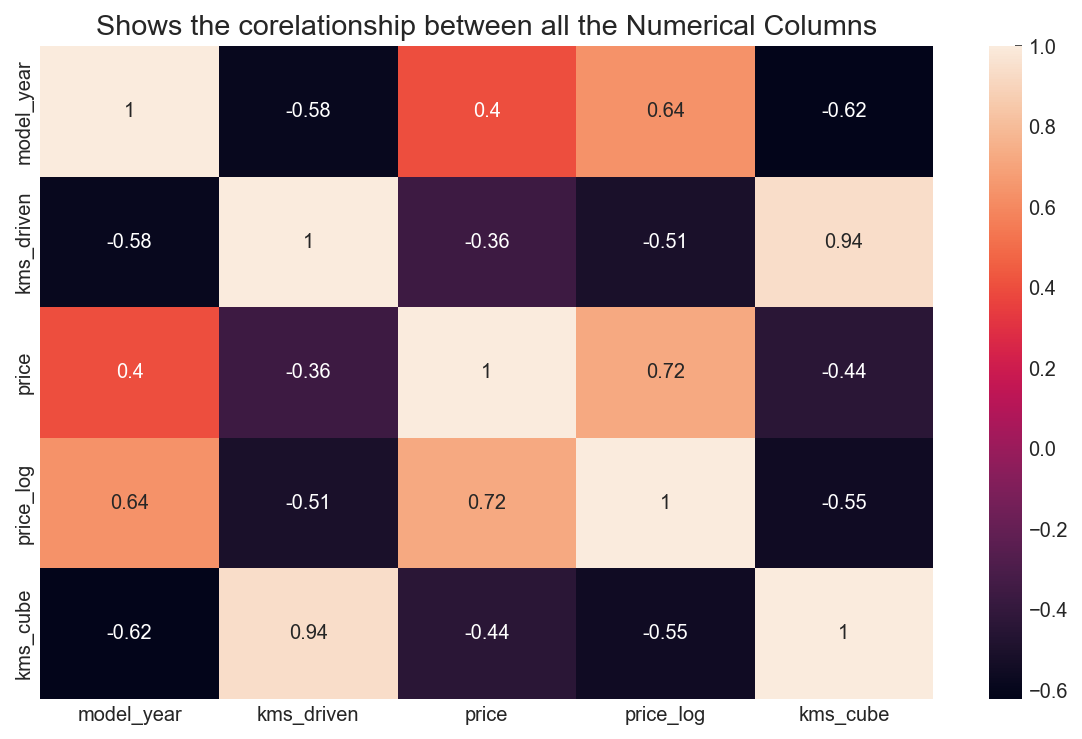

In [101]:
# This is heat map for the all the numerical columns.
plt.figure(figsize=(10,6))
sns.heatmap(bike_corr, annot=True)
plt.title('Shows the corelationship between all the Numerical Columns');

In [102]:
fig = px.imshow(bike_corr, text_auto=True, title='corelationship between all the Numerical Columns')
fig.show()

In [103]:
bike_cleaned

brand sub_brand  model_year owner  kms_driven  price    location  \
0        TVS    Scooty        2012     1       10000  12000  Hyderabad    
1      Bajaj    Pulsar        2010     2       50000  35000  Hyderabad    
2      Honda        CB        2017     1       59000  75000  Hyderabad    
3        TVS    Scooty        2019     1        9000  45000  Hyderabad    
4     Yamaha   Fascino        2016     1       25000  25000  Hyderabad    
...      ...       ...         ...   ...         ...    ...         ...   
1005  Yamaha   Fascino        2017     1       19000  34000    Chennai    
1006  Yamaha       Ray        2018     1        4900  50000    Chennai    
1007   Bajaj    Pulsar        2020     1       20134  90000    Chennai    
1008  Yamaha       Ray        2018     1        6475  50000    Chennai    
1009   Bajaj   Avenger        2014     1       15000  50000    Chennai    

           updated_date  price_log  kms_cube  
0      07 December 2022        9.0      22.0  
1      07 December 2022       10.0      37.0  
2      06 December 2022       11.0      39.0  
3      06 December 2022       11.0      21.0  
4      05 December 2022       10.0      29.0  
...                 ...        ...       ...  
1005  12 September 2022       10.0      27.0  
1006  12 September 2022       11.0      17.0  
1007  12 September 2022       11.0      27.0  
1008  10 September 2022       11.0      19.0  
1009  10 September 2022       11.0      25.0  

[1010 rows x 10 columns]

___